# Creating the histogram for hand gesture detection

In [5]:
import cv2
import numpy as np
import pickle, os, sqlite3, random

#creating a function to build the histogram for gesture detection
def build_histogram(image):
    #deciding the dimensions of the histogram
    x,y,width,height = 420,140,10,10
    d = 10
    imageCrop = None
    crop = None
    for i in range(10):
        for j in range(5):
            if np.any(imageCrop == None):
                imageCrop = image[y:y+height, x:x+width]
            else:
                imageCrop = np.hstack((imageCrop, image[y:y+height, x:x+width]))
            #print(imageCrop.shape)
            cv2.rectangle(image, (x,y), (x+width, y+height), (0,255,0), 1)
            x+=width+d
        if np.any(crop == None):
            crop = imageCrop
        else:
            crop = np.vstack((crop, imageCrop)) 
        imageCrop = None
        x = 420
        y+=height+d
    return crop

#creating a function for detecting the hand within the histogram
def get_hand_histogram():
    camera = cv2.VideoCapture(1)
    if camera.read()[0]==False:
        camera = cv2.VideoCapture(0)
    x, y, width, height = 300, 100, 300, 300
    flagPressedC, flagPressedS = False, False
    imageCrop = None
    while True:
        image = camera.read()[1]
        image = cv2.flip(image, 1)
        image = cv2.resize(image, (640, 480))
        #setting the color for detecting the skin color
        hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        
        keypress = cv2.waitKey(1)
        if keypress == ord('c'):		
            hsvCrop = cv2.cvtColor(imageCrop, cv2.COLOR_BGR2HSV)
            flagPressedC = True
            hist = cv2.calcHist([hsvCrop], [0, 1], None, [180, 256], [0, 180, 0, 256])
            cv2.normalize(hist, hist, 0, 255, cv2.NORM_MINMAX)
        elif keypress == ord('s'):
            flagPressedS = True	
            break
        if flagPressedC:	
            dst = cv2.calcBackProject([hsv], [0, 1], hist, [0, 180, 0, 256], 1)
            dst1 = dst.copy()
            disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
            cv2.filter2D(dst,-1,disc,dst)
            blur = cv2.GaussianBlur(dst, (11,11), 0)
            blur = cv2.medianBlur(blur, 15)
            ret,thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            thresh = cv2.merge((thresh,thresh,thresh))
            #cv2.imshow("res", res)
            cv2.imshow("Thresh", thresh)
        if not flagPressedS:
            imageCrop = build_histogram(image)
        #cv2.rectangle(image, (x,y), (x+width, y+height), (0,255,0), 2)
        cv2.imshow("Set hand histogram", image)
    camera.release()
    cv2.destroyAllWindows()
    with open("hist", "wb") as f:
        pickle.dump(hist, f)


get_hand_histogram()

# Flip Images

In [6]:
#flipping the images for higher accuracy
def image_flip():
    gesture_folder = "gestures"
    images_labels = []
    images = []
    labels = []
    for g_id in os.listdir(gesture_folder):
        for i in range(1200):
            path = gesture_folder+"/"+g_id+"/"+str(i+1)+".jpg"
            new_path = gesture_folder+"/"+g_id+"/"+str(i+1+1200)+".jpg"
            print(path)
            image = cv2.imread(path, 0)
            image = cv2.flip(image, 1)
            cv2.imwrite(new_path, image)

image_flip()

gestures/0/1.jpg
gestures/0/2.jpg
gestures/0/3.jpg
gestures/0/4.jpg
gestures/0/5.jpg
gestures/0/6.jpg
gestures/0/7.jpg
gestures/0/8.jpg
gestures/0/9.jpg
gestures/0/10.jpg
gestures/0/11.jpg
gestures/0/12.jpg
gestures/0/13.jpg
gestures/0/14.jpg
gestures/0/15.jpg
gestures/0/16.jpg
gestures/0/17.jpg
gestures/0/18.jpg
gestures/0/19.jpg
gestures/0/20.jpg
gestures/0/21.jpg
gestures/0/22.jpg
gestures/0/23.jpg
gestures/0/24.jpg
gestures/0/25.jpg
gestures/0/26.jpg
gestures/0/27.jpg
gestures/0/28.jpg
gestures/0/29.jpg
gestures/0/30.jpg
gestures/0/31.jpg
gestures/0/32.jpg
gestures/0/33.jpg
gestures/0/34.jpg
gestures/0/35.jpg
gestures/0/36.jpg
gestures/0/37.jpg
gestures/0/38.jpg
gestures/0/39.jpg
gestures/0/40.jpg
gestures/0/41.jpg
gestures/0/42.jpg
gestures/0/43.jpg
gestures/0/44.jpg
gestures/0/45.jpg
gestures/0/46.jpg
gestures/0/47.jpg
gestures/0/48.jpg
gestures/0/49.jpg
gestures/0/50.jpg
gestures/0/51.jpg
gestures/0/52.jpg
gestures/0/53.jpg
gestures/0/54.jpg
gestures/0/55.jpg
gestures/0/56.jpg
g

gestures/0/452.jpg
gestures/0/453.jpg
gestures/0/454.jpg
gestures/0/455.jpg
gestures/0/456.jpg
gestures/0/457.jpg
gestures/0/458.jpg
gestures/0/459.jpg
gestures/0/460.jpg
gestures/0/461.jpg
gestures/0/462.jpg
gestures/0/463.jpg
gestures/0/464.jpg
gestures/0/465.jpg
gestures/0/466.jpg
gestures/0/467.jpg
gestures/0/468.jpg
gestures/0/469.jpg
gestures/0/470.jpg
gestures/0/471.jpg
gestures/0/472.jpg
gestures/0/473.jpg
gestures/0/474.jpg
gestures/0/475.jpg
gestures/0/476.jpg
gestures/0/477.jpg
gestures/0/478.jpg
gestures/0/479.jpg
gestures/0/480.jpg
gestures/0/481.jpg
gestures/0/482.jpg
gestures/0/483.jpg
gestures/0/484.jpg
gestures/0/485.jpg
gestures/0/486.jpg
gestures/0/487.jpg
gestures/0/488.jpg
gestures/0/489.jpg
gestures/0/490.jpg
gestures/0/491.jpg
gestures/0/492.jpg
gestures/0/493.jpg
gestures/0/494.jpg
gestures/0/495.jpg
gestures/0/496.jpg
gestures/0/497.jpg
gestures/0/498.jpg
gestures/0/499.jpg
gestures/0/500.jpg
gestures/0/501.jpg
gestures/0/502.jpg
gestures/0/503.jpg
gestures/0/5

gestures/0/907.jpg
gestures/0/908.jpg
gestures/0/909.jpg
gestures/0/910.jpg
gestures/0/911.jpg
gestures/0/912.jpg
gestures/0/913.jpg
gestures/0/914.jpg
gestures/0/915.jpg
gestures/0/916.jpg
gestures/0/917.jpg
gestures/0/918.jpg
gestures/0/919.jpg
gestures/0/920.jpg
gestures/0/921.jpg
gestures/0/922.jpg
gestures/0/923.jpg
gestures/0/924.jpg
gestures/0/925.jpg
gestures/0/926.jpg
gestures/0/927.jpg
gestures/0/928.jpg
gestures/0/929.jpg
gestures/0/930.jpg
gestures/0/931.jpg
gestures/0/932.jpg
gestures/0/933.jpg
gestures/0/934.jpg
gestures/0/935.jpg
gestures/0/936.jpg
gestures/0/937.jpg
gestures/0/938.jpg
gestures/0/939.jpg
gestures/0/940.jpg
gestures/0/941.jpg
gestures/0/942.jpg
gestures/0/943.jpg
gestures/0/944.jpg
gestures/0/945.jpg
gestures/0/946.jpg
gestures/0/947.jpg
gestures/0/948.jpg
gestures/0/949.jpg
gestures/0/950.jpg
gestures/0/951.jpg
gestures/0/952.jpg
gestures/0/953.jpg
gestures/0/954.jpg
gestures/0/955.jpg
gestures/0/956.jpg
gestures/0/957.jpg
gestures/0/958.jpg
gestures/0/9

gestures/1/134.jpg
gestures/1/135.jpg
gestures/1/136.jpg
gestures/1/137.jpg
gestures/1/138.jpg
gestures/1/139.jpg
gestures/1/140.jpg
gestures/1/141.jpg
gestures/1/142.jpg
gestures/1/143.jpg
gestures/1/144.jpg
gestures/1/145.jpg
gestures/1/146.jpg
gestures/1/147.jpg
gestures/1/148.jpg
gestures/1/149.jpg
gestures/1/150.jpg
gestures/1/151.jpg
gestures/1/152.jpg
gestures/1/153.jpg
gestures/1/154.jpg
gestures/1/155.jpg
gestures/1/156.jpg
gestures/1/157.jpg
gestures/1/158.jpg
gestures/1/159.jpg
gestures/1/160.jpg
gestures/1/161.jpg
gestures/1/162.jpg
gestures/1/163.jpg
gestures/1/164.jpg
gestures/1/165.jpg
gestures/1/166.jpg
gestures/1/167.jpg
gestures/1/168.jpg
gestures/1/169.jpg
gestures/1/170.jpg
gestures/1/171.jpg
gestures/1/172.jpg
gestures/1/173.jpg
gestures/1/174.jpg
gestures/1/175.jpg
gestures/1/176.jpg
gestures/1/177.jpg
gestures/1/178.jpg
gestures/1/179.jpg
gestures/1/180.jpg
gestures/1/181.jpg
gestures/1/182.jpg
gestures/1/183.jpg
gestures/1/184.jpg
gestures/1/185.jpg
gestures/1/1

gestures/1/572.jpg
gestures/1/573.jpg
gestures/1/574.jpg
gestures/1/575.jpg
gestures/1/576.jpg
gestures/1/577.jpg
gestures/1/578.jpg
gestures/1/579.jpg
gestures/1/580.jpg
gestures/1/581.jpg
gestures/1/582.jpg
gestures/1/583.jpg
gestures/1/584.jpg
gestures/1/585.jpg
gestures/1/586.jpg
gestures/1/587.jpg
gestures/1/588.jpg
gestures/1/589.jpg
gestures/1/590.jpg
gestures/1/591.jpg
gestures/1/592.jpg
gestures/1/593.jpg
gestures/1/594.jpg
gestures/1/595.jpg
gestures/1/596.jpg
gestures/1/597.jpg
gestures/1/598.jpg
gestures/1/599.jpg
gestures/1/600.jpg
gestures/1/601.jpg
gestures/1/602.jpg
gestures/1/603.jpg
gestures/1/604.jpg
gestures/1/605.jpg
gestures/1/606.jpg
gestures/1/607.jpg
gestures/1/608.jpg
gestures/1/609.jpg
gestures/1/610.jpg
gestures/1/611.jpg
gestures/1/612.jpg
gestures/1/613.jpg
gestures/1/614.jpg
gestures/1/615.jpg
gestures/1/616.jpg
gestures/1/617.jpg
gestures/1/618.jpg
gestures/1/619.jpg
gestures/1/620.jpg
gestures/1/621.jpg
gestures/1/622.jpg
gestures/1/623.jpg
gestures/1/6

gestures/1/1012.jpg
gestures/1/1013.jpg
gestures/1/1014.jpg
gestures/1/1015.jpg
gestures/1/1016.jpg
gestures/1/1017.jpg
gestures/1/1018.jpg
gestures/1/1019.jpg
gestures/1/1020.jpg
gestures/1/1021.jpg
gestures/1/1022.jpg
gestures/1/1023.jpg
gestures/1/1024.jpg
gestures/1/1025.jpg
gestures/1/1026.jpg
gestures/1/1027.jpg
gestures/1/1028.jpg
gestures/1/1029.jpg
gestures/1/1030.jpg
gestures/1/1031.jpg
gestures/1/1032.jpg
gestures/1/1033.jpg
gestures/1/1034.jpg
gestures/1/1035.jpg
gestures/1/1036.jpg
gestures/1/1037.jpg
gestures/1/1038.jpg
gestures/1/1039.jpg
gestures/1/1040.jpg
gestures/1/1041.jpg
gestures/1/1042.jpg
gestures/1/1043.jpg
gestures/1/1044.jpg
gestures/1/1045.jpg
gestures/1/1046.jpg
gestures/1/1047.jpg
gestures/1/1048.jpg
gestures/1/1049.jpg
gestures/1/1050.jpg
gestures/1/1051.jpg
gestures/1/1052.jpg
gestures/1/1053.jpg
gestures/1/1054.jpg
gestures/1/1055.jpg
gestures/1/1056.jpg
gestures/1/1057.jpg
gestures/1/1058.jpg
gestures/1/1059.jpg
gestures/1/1060.jpg
gestures/1/1061.jpg


gestures/10/229.jpg
gestures/10/230.jpg
gestures/10/231.jpg
gestures/10/232.jpg
gestures/10/233.jpg
gestures/10/234.jpg
gestures/10/235.jpg
gestures/10/236.jpg
gestures/10/237.jpg
gestures/10/238.jpg
gestures/10/239.jpg
gestures/10/240.jpg
gestures/10/241.jpg
gestures/10/242.jpg
gestures/10/243.jpg
gestures/10/244.jpg
gestures/10/245.jpg
gestures/10/246.jpg
gestures/10/247.jpg
gestures/10/248.jpg
gestures/10/249.jpg
gestures/10/250.jpg
gestures/10/251.jpg
gestures/10/252.jpg
gestures/10/253.jpg
gestures/10/254.jpg
gestures/10/255.jpg
gestures/10/256.jpg
gestures/10/257.jpg
gestures/10/258.jpg
gestures/10/259.jpg
gestures/10/260.jpg
gestures/10/261.jpg
gestures/10/262.jpg
gestures/10/263.jpg
gestures/10/264.jpg
gestures/10/265.jpg
gestures/10/266.jpg
gestures/10/267.jpg
gestures/10/268.jpg
gestures/10/269.jpg
gestures/10/270.jpg
gestures/10/271.jpg
gestures/10/272.jpg
gestures/10/273.jpg
gestures/10/274.jpg
gestures/10/275.jpg
gestures/10/276.jpg
gestures/10/277.jpg
gestures/10/278.jpg


gestures/10/643.jpg
gestures/10/644.jpg
gestures/10/645.jpg
gestures/10/646.jpg
gestures/10/647.jpg
gestures/10/648.jpg
gestures/10/649.jpg
gestures/10/650.jpg
gestures/10/651.jpg
gestures/10/652.jpg
gestures/10/653.jpg
gestures/10/654.jpg
gestures/10/655.jpg
gestures/10/656.jpg
gestures/10/657.jpg
gestures/10/658.jpg
gestures/10/659.jpg
gestures/10/660.jpg
gestures/10/661.jpg
gestures/10/662.jpg
gestures/10/663.jpg
gestures/10/664.jpg
gestures/10/665.jpg
gestures/10/666.jpg
gestures/10/667.jpg
gestures/10/668.jpg
gestures/10/669.jpg
gestures/10/670.jpg
gestures/10/671.jpg
gestures/10/672.jpg
gestures/10/673.jpg
gestures/10/674.jpg
gestures/10/675.jpg
gestures/10/676.jpg
gestures/10/677.jpg
gestures/10/678.jpg
gestures/10/679.jpg
gestures/10/680.jpg
gestures/10/681.jpg
gestures/10/682.jpg
gestures/10/683.jpg
gestures/10/684.jpg
gestures/10/685.jpg
gestures/10/686.jpg
gestures/10/687.jpg
gestures/10/688.jpg
gestures/10/689.jpg
gestures/10/690.jpg
gestures/10/691.jpg
gestures/10/692.jpg


gestures/10/1057.jpg
gestures/10/1058.jpg
gestures/10/1059.jpg
gestures/10/1060.jpg
gestures/10/1061.jpg
gestures/10/1062.jpg
gestures/10/1063.jpg
gestures/10/1064.jpg
gestures/10/1065.jpg
gestures/10/1066.jpg
gestures/10/1067.jpg
gestures/10/1068.jpg
gestures/10/1069.jpg
gestures/10/1070.jpg
gestures/10/1071.jpg
gestures/10/1072.jpg
gestures/10/1073.jpg
gestures/10/1074.jpg
gestures/10/1075.jpg
gestures/10/1076.jpg
gestures/10/1077.jpg
gestures/10/1078.jpg
gestures/10/1079.jpg
gestures/10/1080.jpg
gestures/10/1081.jpg
gestures/10/1082.jpg
gestures/10/1083.jpg
gestures/10/1084.jpg
gestures/10/1085.jpg
gestures/10/1086.jpg
gestures/10/1087.jpg
gestures/10/1088.jpg
gestures/10/1089.jpg
gestures/10/1090.jpg
gestures/10/1091.jpg
gestures/10/1092.jpg
gestures/10/1093.jpg
gestures/10/1094.jpg
gestures/10/1095.jpg
gestures/10/1096.jpg
gestures/10/1097.jpg
gestures/10/1098.jpg
gestures/10/1099.jpg
gestures/10/1100.jpg
gestures/10/1101.jpg
gestures/10/1102.jpg
gestures/10/1103.jpg
gestures/10/1

gestures/11/278.jpg
gestures/11/279.jpg
gestures/11/280.jpg
gestures/11/281.jpg
gestures/11/282.jpg
gestures/11/283.jpg
gestures/11/284.jpg
gestures/11/285.jpg
gestures/11/286.jpg
gestures/11/287.jpg
gestures/11/288.jpg
gestures/11/289.jpg
gestures/11/290.jpg
gestures/11/291.jpg
gestures/11/292.jpg
gestures/11/293.jpg
gestures/11/294.jpg
gestures/11/295.jpg
gestures/11/296.jpg
gestures/11/297.jpg
gestures/11/298.jpg
gestures/11/299.jpg
gestures/11/300.jpg
gestures/11/301.jpg
gestures/11/302.jpg
gestures/11/303.jpg
gestures/11/304.jpg
gestures/11/305.jpg
gestures/11/306.jpg
gestures/11/307.jpg
gestures/11/308.jpg
gestures/11/309.jpg
gestures/11/310.jpg
gestures/11/311.jpg
gestures/11/312.jpg
gestures/11/313.jpg
gestures/11/314.jpg
gestures/11/315.jpg
gestures/11/316.jpg
gestures/11/317.jpg
gestures/11/318.jpg
gestures/11/319.jpg
gestures/11/320.jpg
gestures/11/321.jpg
gestures/11/322.jpg
gestures/11/323.jpg
gestures/11/324.jpg
gestures/11/325.jpg
gestures/11/326.jpg
gestures/11/327.jpg


gestures/11/703.jpg
gestures/11/704.jpg
gestures/11/705.jpg
gestures/11/706.jpg
gestures/11/707.jpg
gestures/11/708.jpg
gestures/11/709.jpg
gestures/11/710.jpg
gestures/11/711.jpg
gestures/11/712.jpg
gestures/11/713.jpg
gestures/11/714.jpg
gestures/11/715.jpg
gestures/11/716.jpg
gestures/11/717.jpg
gestures/11/718.jpg
gestures/11/719.jpg
gestures/11/720.jpg
gestures/11/721.jpg
gestures/11/722.jpg
gestures/11/723.jpg
gestures/11/724.jpg
gestures/11/725.jpg
gestures/11/726.jpg
gestures/11/727.jpg
gestures/11/728.jpg
gestures/11/729.jpg
gestures/11/730.jpg
gestures/11/731.jpg
gestures/11/732.jpg
gestures/11/733.jpg
gestures/11/734.jpg
gestures/11/735.jpg
gestures/11/736.jpg
gestures/11/737.jpg
gestures/11/738.jpg
gestures/11/739.jpg
gestures/11/740.jpg
gestures/11/741.jpg
gestures/11/742.jpg
gestures/11/743.jpg
gestures/11/744.jpg
gestures/11/745.jpg
gestures/11/746.jpg
gestures/11/747.jpg
gestures/11/748.jpg
gestures/11/749.jpg
gestures/11/750.jpg
gestures/11/751.jpg
gestures/11/752.jpg


gestures/11/1111.jpg
gestures/11/1112.jpg
gestures/11/1113.jpg
gestures/11/1114.jpg
gestures/11/1115.jpg
gestures/11/1116.jpg
gestures/11/1117.jpg
gestures/11/1118.jpg
gestures/11/1119.jpg
gestures/11/1120.jpg
gestures/11/1121.jpg
gestures/11/1122.jpg
gestures/11/1123.jpg
gestures/11/1124.jpg
gestures/11/1125.jpg
gestures/11/1126.jpg
gestures/11/1127.jpg
gestures/11/1128.jpg
gestures/11/1129.jpg
gestures/11/1130.jpg
gestures/11/1131.jpg
gestures/11/1132.jpg
gestures/11/1133.jpg
gestures/11/1134.jpg
gestures/11/1135.jpg
gestures/11/1136.jpg
gestures/11/1137.jpg
gestures/11/1138.jpg
gestures/11/1139.jpg
gestures/11/1140.jpg
gestures/11/1141.jpg
gestures/11/1142.jpg
gestures/11/1143.jpg
gestures/11/1144.jpg
gestures/11/1145.jpg
gestures/11/1146.jpg
gestures/11/1147.jpg
gestures/11/1148.jpg
gestures/11/1149.jpg
gestures/11/1150.jpg
gestures/11/1151.jpg
gestures/11/1152.jpg
gestures/11/1153.jpg
gestures/11/1154.jpg
gestures/11/1155.jpg
gestures/11/1156.jpg
gestures/11/1157.jpg
gestures/11/1

gestures/12/336.jpg
gestures/12/337.jpg
gestures/12/338.jpg
gestures/12/339.jpg
gestures/12/340.jpg
gestures/12/341.jpg
gestures/12/342.jpg
gestures/12/343.jpg
gestures/12/344.jpg
gestures/12/345.jpg
gestures/12/346.jpg
gestures/12/347.jpg
gestures/12/348.jpg
gestures/12/349.jpg
gestures/12/350.jpg
gestures/12/351.jpg
gestures/12/352.jpg
gestures/12/353.jpg
gestures/12/354.jpg
gestures/12/355.jpg
gestures/12/356.jpg
gestures/12/357.jpg
gestures/12/358.jpg
gestures/12/359.jpg
gestures/12/360.jpg
gestures/12/361.jpg
gestures/12/362.jpg
gestures/12/363.jpg
gestures/12/364.jpg
gestures/12/365.jpg
gestures/12/366.jpg
gestures/12/367.jpg
gestures/12/368.jpg
gestures/12/369.jpg
gestures/12/370.jpg
gestures/12/371.jpg
gestures/12/372.jpg
gestures/12/373.jpg
gestures/12/374.jpg
gestures/12/375.jpg
gestures/12/376.jpg
gestures/12/377.jpg
gestures/12/378.jpg
gestures/12/379.jpg
gestures/12/380.jpg
gestures/12/381.jpg
gestures/12/382.jpg
gestures/12/383.jpg
gestures/12/384.jpg
gestures/12/385.jpg


gestures/12/745.jpg
gestures/12/746.jpg
gestures/12/747.jpg
gestures/12/748.jpg
gestures/12/749.jpg
gestures/12/750.jpg
gestures/12/751.jpg
gestures/12/752.jpg
gestures/12/753.jpg
gestures/12/754.jpg
gestures/12/755.jpg
gestures/12/756.jpg
gestures/12/757.jpg
gestures/12/758.jpg
gestures/12/759.jpg
gestures/12/760.jpg
gestures/12/761.jpg
gestures/12/762.jpg
gestures/12/763.jpg
gestures/12/764.jpg
gestures/12/765.jpg
gestures/12/766.jpg
gestures/12/767.jpg
gestures/12/768.jpg
gestures/12/769.jpg
gestures/12/770.jpg
gestures/12/771.jpg
gestures/12/772.jpg
gestures/12/773.jpg
gestures/12/774.jpg
gestures/12/775.jpg
gestures/12/776.jpg
gestures/12/777.jpg
gestures/12/778.jpg
gestures/12/779.jpg
gestures/12/780.jpg
gestures/12/781.jpg
gestures/12/782.jpg
gestures/12/783.jpg
gestures/12/784.jpg
gestures/12/785.jpg
gestures/12/786.jpg
gestures/12/787.jpg
gestures/12/788.jpg
gestures/12/789.jpg
gestures/12/790.jpg
gestures/12/791.jpg
gestures/12/792.jpg
gestures/12/793.jpg
gestures/12/794.jpg


gestures/12/1159.jpg
gestures/12/1160.jpg
gestures/12/1161.jpg
gestures/12/1162.jpg
gestures/12/1163.jpg
gestures/12/1164.jpg
gestures/12/1165.jpg
gestures/12/1166.jpg
gestures/12/1167.jpg
gestures/12/1168.jpg
gestures/12/1169.jpg
gestures/12/1170.jpg
gestures/12/1171.jpg
gestures/12/1172.jpg
gestures/12/1173.jpg
gestures/12/1174.jpg
gestures/12/1175.jpg
gestures/12/1176.jpg
gestures/12/1177.jpg
gestures/12/1178.jpg
gestures/12/1179.jpg
gestures/12/1180.jpg
gestures/12/1181.jpg
gestures/12/1182.jpg
gestures/12/1183.jpg
gestures/12/1184.jpg
gestures/12/1185.jpg
gestures/12/1186.jpg
gestures/12/1187.jpg
gestures/12/1188.jpg
gestures/12/1189.jpg
gestures/12/1190.jpg
gestures/12/1191.jpg
gestures/12/1192.jpg
gestures/12/1193.jpg
gestures/12/1194.jpg
gestures/12/1195.jpg
gestures/12/1196.jpg
gestures/12/1197.jpg
gestures/12/1198.jpg
gestures/12/1199.jpg
gestures/12/1200.jpg
gestures/13/1.jpg
gestures/13/2.jpg
gestures/13/3.jpg
gestures/13/4.jpg
gestures/13/5.jpg
gestures/13/6.jpg
gestures/1

gestures/13/388.jpg
gestures/13/389.jpg
gestures/13/390.jpg
gestures/13/391.jpg
gestures/13/392.jpg
gestures/13/393.jpg
gestures/13/394.jpg
gestures/13/395.jpg
gestures/13/396.jpg
gestures/13/397.jpg
gestures/13/398.jpg
gestures/13/399.jpg
gestures/13/400.jpg
gestures/13/401.jpg
gestures/13/402.jpg
gestures/13/403.jpg
gestures/13/404.jpg
gestures/13/405.jpg
gestures/13/406.jpg
gestures/13/407.jpg
gestures/13/408.jpg
gestures/13/409.jpg
gestures/13/410.jpg
gestures/13/411.jpg
gestures/13/412.jpg
gestures/13/413.jpg
gestures/13/414.jpg
gestures/13/415.jpg
gestures/13/416.jpg
gestures/13/417.jpg
gestures/13/418.jpg
gestures/13/419.jpg
gestures/13/420.jpg
gestures/13/421.jpg
gestures/13/422.jpg
gestures/13/423.jpg
gestures/13/424.jpg
gestures/13/425.jpg
gestures/13/426.jpg
gestures/13/427.jpg
gestures/13/428.jpg
gestures/13/429.jpg
gestures/13/430.jpg
gestures/13/431.jpg
gestures/13/432.jpg
gestures/13/433.jpg
gestures/13/434.jpg
gestures/13/435.jpg
gestures/13/436.jpg
gestures/13/437.jpg


gestures/13/809.jpg
gestures/13/810.jpg
gestures/13/811.jpg
gestures/13/812.jpg
gestures/13/813.jpg
gestures/13/814.jpg
gestures/13/815.jpg
gestures/13/816.jpg
gestures/13/817.jpg
gestures/13/818.jpg
gestures/13/819.jpg
gestures/13/820.jpg
gestures/13/821.jpg
gestures/13/822.jpg
gestures/13/823.jpg
gestures/13/824.jpg
gestures/13/825.jpg
gestures/13/826.jpg
gestures/13/827.jpg
gestures/13/828.jpg
gestures/13/829.jpg
gestures/13/830.jpg
gestures/13/831.jpg
gestures/13/832.jpg
gestures/13/833.jpg
gestures/13/834.jpg
gestures/13/835.jpg
gestures/13/836.jpg
gestures/13/837.jpg
gestures/13/838.jpg
gestures/13/839.jpg
gestures/13/840.jpg
gestures/13/841.jpg
gestures/13/842.jpg
gestures/13/843.jpg
gestures/13/844.jpg
gestures/13/845.jpg
gestures/13/846.jpg
gestures/13/847.jpg
gestures/13/848.jpg
gestures/13/849.jpg
gestures/13/850.jpg
gestures/13/851.jpg
gestures/13/852.jpg
gestures/13/853.jpg
gestures/13/854.jpg
gestures/13/855.jpg
gestures/13/856.jpg
gestures/13/857.jpg
gestures/13/858.jpg


gestures/14/15.jpg
gestures/14/16.jpg
gestures/14/17.jpg
gestures/14/18.jpg
gestures/14/19.jpg
gestures/14/20.jpg
gestures/14/21.jpg
gestures/14/22.jpg
gestures/14/23.jpg
gestures/14/24.jpg
gestures/14/25.jpg
gestures/14/26.jpg
gestures/14/27.jpg
gestures/14/28.jpg
gestures/14/29.jpg
gestures/14/30.jpg
gestures/14/31.jpg
gestures/14/32.jpg
gestures/14/33.jpg
gestures/14/34.jpg
gestures/14/35.jpg
gestures/14/36.jpg
gestures/14/37.jpg
gestures/14/38.jpg
gestures/14/39.jpg
gestures/14/40.jpg
gestures/14/41.jpg
gestures/14/42.jpg
gestures/14/43.jpg
gestures/14/44.jpg
gestures/14/45.jpg
gestures/14/46.jpg
gestures/14/47.jpg
gestures/14/48.jpg
gestures/14/49.jpg
gestures/14/50.jpg
gestures/14/51.jpg
gestures/14/52.jpg
gestures/14/53.jpg
gestures/14/54.jpg
gestures/14/55.jpg
gestures/14/56.jpg
gestures/14/57.jpg
gestures/14/58.jpg
gestures/14/59.jpg
gestures/14/60.jpg
gestures/14/61.jpg
gestures/14/62.jpg
gestures/14/63.jpg
gestures/14/64.jpg
gestures/14/65.jpg
gestures/14/66.jpg
gestures/14/

gestures/14/442.jpg
gestures/14/443.jpg
gestures/14/444.jpg
gestures/14/445.jpg
gestures/14/446.jpg
gestures/14/447.jpg
gestures/14/448.jpg
gestures/14/449.jpg
gestures/14/450.jpg
gestures/14/451.jpg
gestures/14/452.jpg
gestures/14/453.jpg
gestures/14/454.jpg
gestures/14/455.jpg
gestures/14/456.jpg
gestures/14/457.jpg
gestures/14/458.jpg
gestures/14/459.jpg
gestures/14/460.jpg
gestures/14/461.jpg
gestures/14/462.jpg
gestures/14/463.jpg
gestures/14/464.jpg
gestures/14/465.jpg
gestures/14/466.jpg
gestures/14/467.jpg
gestures/14/468.jpg
gestures/14/469.jpg
gestures/14/470.jpg
gestures/14/471.jpg
gestures/14/472.jpg
gestures/14/473.jpg
gestures/14/474.jpg
gestures/14/475.jpg
gestures/14/476.jpg
gestures/14/477.jpg
gestures/14/478.jpg
gestures/14/479.jpg
gestures/14/480.jpg
gestures/14/481.jpg
gestures/14/482.jpg
gestures/14/483.jpg
gestures/14/484.jpg
gestures/14/485.jpg
gestures/14/486.jpg
gestures/14/487.jpg
gestures/14/488.jpg
gestures/14/489.jpg
gestures/14/490.jpg
gestures/14/491.jpg


gestures/14/852.jpg
gestures/14/853.jpg
gestures/14/854.jpg
gestures/14/855.jpg
gestures/14/856.jpg
gestures/14/857.jpg
gestures/14/858.jpg
gestures/14/859.jpg
gestures/14/860.jpg
gestures/14/861.jpg
gestures/14/862.jpg
gestures/14/863.jpg
gestures/14/864.jpg
gestures/14/865.jpg
gestures/14/866.jpg
gestures/14/867.jpg
gestures/14/868.jpg
gestures/14/869.jpg
gestures/14/870.jpg
gestures/14/871.jpg
gestures/14/872.jpg
gestures/14/873.jpg
gestures/14/874.jpg
gestures/14/875.jpg
gestures/14/876.jpg
gestures/14/877.jpg
gestures/14/878.jpg
gestures/14/879.jpg
gestures/14/880.jpg
gestures/14/881.jpg
gestures/14/882.jpg
gestures/14/883.jpg
gestures/14/884.jpg
gestures/14/885.jpg
gestures/14/886.jpg
gestures/14/887.jpg
gestures/14/888.jpg
gestures/14/889.jpg
gestures/14/890.jpg
gestures/14/891.jpg
gestures/14/892.jpg
gestures/14/893.jpg
gestures/14/894.jpg
gestures/14/895.jpg
gestures/14/896.jpg
gestures/14/897.jpg
gestures/14/898.jpg
gestures/14/899.jpg
gestures/14/900.jpg
gestures/14/901.jpg


gestures/15/58.jpg
gestures/15/59.jpg
gestures/15/60.jpg
gestures/15/61.jpg
gestures/15/62.jpg
gestures/15/63.jpg
gestures/15/64.jpg
gestures/15/65.jpg
gestures/15/66.jpg
gestures/15/67.jpg
gestures/15/68.jpg
gestures/15/69.jpg
gestures/15/70.jpg
gestures/15/71.jpg
gestures/15/72.jpg
gestures/15/73.jpg
gestures/15/74.jpg
gestures/15/75.jpg
gestures/15/76.jpg
gestures/15/77.jpg
gestures/15/78.jpg
gestures/15/79.jpg
gestures/15/80.jpg
gestures/15/81.jpg
gestures/15/82.jpg
gestures/15/83.jpg
gestures/15/84.jpg
gestures/15/85.jpg
gestures/15/86.jpg
gestures/15/87.jpg
gestures/15/88.jpg
gestures/15/89.jpg
gestures/15/90.jpg
gestures/15/91.jpg
gestures/15/92.jpg
gestures/15/93.jpg
gestures/15/94.jpg
gestures/15/95.jpg
gestures/15/96.jpg
gestures/15/97.jpg
gestures/15/98.jpg
gestures/15/99.jpg
gestures/15/100.jpg
gestures/15/101.jpg
gestures/15/102.jpg
gestures/15/103.jpg
gestures/15/104.jpg
gestures/15/105.jpg
gestures/15/106.jpg
gestures/15/107.jpg
gestures/15/108.jpg
gestures/15/109.jpg
ge

gestures/15/472.jpg
gestures/15/473.jpg
gestures/15/474.jpg
gestures/15/475.jpg
gestures/15/476.jpg
gestures/15/477.jpg
gestures/15/478.jpg
gestures/15/479.jpg
gestures/15/480.jpg
gestures/15/481.jpg
gestures/15/482.jpg
gestures/15/483.jpg
gestures/15/484.jpg
gestures/15/485.jpg
gestures/15/486.jpg
gestures/15/487.jpg
gestures/15/488.jpg
gestures/15/489.jpg
gestures/15/490.jpg
gestures/15/491.jpg
gestures/15/492.jpg
gestures/15/493.jpg
gestures/15/494.jpg
gestures/15/495.jpg
gestures/15/496.jpg
gestures/15/497.jpg
gestures/15/498.jpg
gestures/15/499.jpg
gestures/15/500.jpg
gestures/15/501.jpg
gestures/15/502.jpg
gestures/15/503.jpg
gestures/15/504.jpg
gestures/15/505.jpg
gestures/15/506.jpg
gestures/15/507.jpg
gestures/15/508.jpg
gestures/15/509.jpg
gestures/15/510.jpg
gestures/15/511.jpg
gestures/15/512.jpg
gestures/15/513.jpg
gestures/15/514.jpg
gestures/15/515.jpg
gestures/15/516.jpg
gestures/15/517.jpg
gestures/15/518.jpg
gestures/15/519.jpg
gestures/15/520.jpg
gestures/15/521.jpg


gestures/15/899.jpg
gestures/15/900.jpg
gestures/15/901.jpg
gestures/15/902.jpg
gestures/15/903.jpg
gestures/15/904.jpg
gestures/15/905.jpg
gestures/15/906.jpg
gestures/15/907.jpg
gestures/15/908.jpg
gestures/15/909.jpg
gestures/15/910.jpg
gestures/15/911.jpg
gestures/15/912.jpg
gestures/15/913.jpg
gestures/15/914.jpg
gestures/15/915.jpg
gestures/15/916.jpg
gestures/15/917.jpg
gestures/15/918.jpg
gestures/15/919.jpg
gestures/15/920.jpg
gestures/15/921.jpg
gestures/15/922.jpg
gestures/15/923.jpg
gestures/15/924.jpg
gestures/15/925.jpg
gestures/15/926.jpg
gestures/15/927.jpg
gestures/15/928.jpg
gestures/15/929.jpg
gestures/15/930.jpg
gestures/15/931.jpg
gestures/15/932.jpg
gestures/15/933.jpg
gestures/15/934.jpg
gestures/15/935.jpg
gestures/15/936.jpg
gestures/15/937.jpg
gestures/15/938.jpg
gestures/15/939.jpg
gestures/15/940.jpg
gestures/15/941.jpg
gestures/15/942.jpg
gestures/15/943.jpg
gestures/15/944.jpg
gestures/15/945.jpg
gestures/15/946.jpg
gestures/15/947.jpg
gestures/15/948.jpg


gestures/16/104.jpg
gestures/16/105.jpg
gestures/16/106.jpg
gestures/16/107.jpg
gestures/16/108.jpg
gestures/16/109.jpg
gestures/16/110.jpg
gestures/16/111.jpg
gestures/16/112.jpg
gestures/16/113.jpg
gestures/16/114.jpg
gestures/16/115.jpg
gestures/16/116.jpg
gestures/16/117.jpg
gestures/16/118.jpg
gestures/16/119.jpg
gestures/16/120.jpg
gestures/16/121.jpg
gestures/16/122.jpg
gestures/16/123.jpg
gestures/16/124.jpg
gestures/16/125.jpg
gestures/16/126.jpg
gestures/16/127.jpg
gestures/16/128.jpg
gestures/16/129.jpg
gestures/16/130.jpg
gestures/16/131.jpg
gestures/16/132.jpg
gestures/16/133.jpg
gestures/16/134.jpg
gestures/16/135.jpg
gestures/16/136.jpg
gestures/16/137.jpg
gestures/16/138.jpg
gestures/16/139.jpg
gestures/16/140.jpg
gestures/16/141.jpg
gestures/16/142.jpg
gestures/16/143.jpg
gestures/16/144.jpg
gestures/16/145.jpg
gestures/16/146.jpg
gestures/16/147.jpg
gestures/16/148.jpg
gestures/16/149.jpg
gestures/16/150.jpg
gestures/16/151.jpg
gestures/16/152.jpg
gestures/16/153.jpg


gestures/16/540.jpg
gestures/16/541.jpg
gestures/16/542.jpg
gestures/16/543.jpg
gestures/16/544.jpg
gestures/16/545.jpg
gestures/16/546.jpg
gestures/16/547.jpg
gestures/16/548.jpg
gestures/16/549.jpg
gestures/16/550.jpg
gestures/16/551.jpg
gestures/16/552.jpg
gestures/16/553.jpg
gestures/16/554.jpg
gestures/16/555.jpg
gestures/16/556.jpg
gestures/16/557.jpg
gestures/16/558.jpg
gestures/16/559.jpg
gestures/16/560.jpg
gestures/16/561.jpg
gestures/16/562.jpg
gestures/16/563.jpg
gestures/16/564.jpg
gestures/16/565.jpg
gestures/16/566.jpg
gestures/16/567.jpg
gestures/16/568.jpg
gestures/16/569.jpg
gestures/16/570.jpg
gestures/16/571.jpg
gestures/16/572.jpg
gestures/16/573.jpg
gestures/16/574.jpg
gestures/16/575.jpg
gestures/16/576.jpg
gestures/16/577.jpg
gestures/16/578.jpg
gestures/16/579.jpg
gestures/16/580.jpg
gestures/16/581.jpg
gestures/16/582.jpg
gestures/16/583.jpg
gestures/16/584.jpg
gestures/16/585.jpg
gestures/16/586.jpg
gestures/16/587.jpg
gestures/16/588.jpg
gestures/16/589.jpg


gestures/16/950.jpg
gestures/16/951.jpg
gestures/16/952.jpg
gestures/16/953.jpg
gestures/16/954.jpg
gestures/16/955.jpg
gestures/16/956.jpg
gestures/16/957.jpg
gestures/16/958.jpg
gestures/16/959.jpg
gestures/16/960.jpg
gestures/16/961.jpg
gestures/16/962.jpg
gestures/16/963.jpg
gestures/16/964.jpg
gestures/16/965.jpg
gestures/16/966.jpg
gestures/16/967.jpg
gestures/16/968.jpg
gestures/16/969.jpg
gestures/16/970.jpg
gestures/16/971.jpg
gestures/16/972.jpg
gestures/16/973.jpg
gestures/16/974.jpg
gestures/16/975.jpg
gestures/16/976.jpg
gestures/16/977.jpg
gestures/16/978.jpg
gestures/16/979.jpg
gestures/16/980.jpg
gestures/16/981.jpg
gestures/16/982.jpg
gestures/16/983.jpg
gestures/16/984.jpg
gestures/16/985.jpg
gestures/16/986.jpg
gestures/16/987.jpg
gestures/16/988.jpg
gestures/16/989.jpg
gestures/16/990.jpg
gestures/16/991.jpg
gestures/16/992.jpg
gestures/16/993.jpg
gestures/16/994.jpg
gestures/16/995.jpg
gestures/16/996.jpg
gestures/16/997.jpg
gestures/16/998.jpg
gestures/16/999.jpg


gestures/17/170.jpg
gestures/17/171.jpg
gestures/17/172.jpg
gestures/17/173.jpg
gestures/17/174.jpg
gestures/17/175.jpg
gestures/17/176.jpg
gestures/17/177.jpg
gestures/17/178.jpg
gestures/17/179.jpg
gestures/17/180.jpg
gestures/17/181.jpg
gestures/17/182.jpg
gestures/17/183.jpg
gestures/17/184.jpg
gestures/17/185.jpg
gestures/17/186.jpg
gestures/17/187.jpg
gestures/17/188.jpg
gestures/17/189.jpg
gestures/17/190.jpg
gestures/17/191.jpg
gestures/17/192.jpg
gestures/17/193.jpg
gestures/17/194.jpg
gestures/17/195.jpg
gestures/17/196.jpg
gestures/17/197.jpg
gestures/17/198.jpg
gestures/17/199.jpg
gestures/17/200.jpg
gestures/17/201.jpg
gestures/17/202.jpg
gestures/17/203.jpg
gestures/17/204.jpg
gestures/17/205.jpg
gestures/17/206.jpg
gestures/17/207.jpg
gestures/17/208.jpg
gestures/17/209.jpg
gestures/17/210.jpg
gestures/17/211.jpg
gestures/17/212.jpg
gestures/17/213.jpg
gestures/17/214.jpg
gestures/17/215.jpg
gestures/17/216.jpg
gestures/17/217.jpg
gestures/17/218.jpg
gestures/17/219.jpg


gestures/17/582.jpg
gestures/17/583.jpg
gestures/17/584.jpg
gestures/17/585.jpg
gestures/17/586.jpg
gestures/17/587.jpg
gestures/17/588.jpg
gestures/17/589.jpg
gestures/17/590.jpg
gestures/17/591.jpg
gestures/17/592.jpg
gestures/17/593.jpg
gestures/17/594.jpg
gestures/17/595.jpg
gestures/17/596.jpg
gestures/17/597.jpg
gestures/17/598.jpg
gestures/17/599.jpg
gestures/17/600.jpg
gestures/17/601.jpg
gestures/17/602.jpg
gestures/17/603.jpg
gestures/17/604.jpg
gestures/17/605.jpg
gestures/17/606.jpg
gestures/17/607.jpg
gestures/17/608.jpg
gestures/17/609.jpg
gestures/17/610.jpg
gestures/17/611.jpg
gestures/17/612.jpg
gestures/17/613.jpg
gestures/17/614.jpg
gestures/17/615.jpg
gestures/17/616.jpg
gestures/17/617.jpg
gestures/17/618.jpg
gestures/17/619.jpg
gestures/17/620.jpg
gestures/17/621.jpg
gestures/17/622.jpg
gestures/17/623.jpg
gestures/17/624.jpg
gestures/17/625.jpg
gestures/17/626.jpg
gestures/17/627.jpg
gestures/17/628.jpg
gestures/17/629.jpg
gestures/17/630.jpg
gestures/17/631.jpg


gestures/17/1002.jpg
gestures/17/1003.jpg
gestures/17/1004.jpg
gestures/17/1005.jpg
gestures/17/1006.jpg
gestures/17/1007.jpg
gestures/17/1008.jpg
gestures/17/1009.jpg
gestures/17/1010.jpg
gestures/17/1011.jpg
gestures/17/1012.jpg
gestures/17/1013.jpg
gestures/17/1014.jpg
gestures/17/1015.jpg
gestures/17/1016.jpg
gestures/17/1017.jpg
gestures/17/1018.jpg
gestures/17/1019.jpg
gestures/17/1020.jpg
gestures/17/1021.jpg
gestures/17/1022.jpg
gestures/17/1023.jpg
gestures/17/1024.jpg
gestures/17/1025.jpg
gestures/17/1026.jpg
gestures/17/1027.jpg
gestures/17/1028.jpg
gestures/17/1029.jpg
gestures/17/1030.jpg
gestures/17/1031.jpg
gestures/17/1032.jpg
gestures/17/1033.jpg
gestures/17/1034.jpg
gestures/17/1035.jpg
gestures/17/1036.jpg
gestures/17/1037.jpg
gestures/17/1038.jpg
gestures/17/1039.jpg
gestures/17/1040.jpg
gestures/17/1041.jpg
gestures/17/1042.jpg
gestures/17/1043.jpg
gestures/17/1044.jpg
gestures/17/1045.jpg
gestures/17/1046.jpg
gestures/17/1047.jpg
gestures/17/1048.jpg
gestures/17/1

gestures/18/210.jpg
gestures/18/211.jpg
gestures/18/212.jpg
gestures/18/213.jpg
gestures/18/214.jpg
gestures/18/215.jpg
gestures/18/216.jpg
gestures/18/217.jpg
gestures/18/218.jpg
gestures/18/219.jpg
gestures/18/220.jpg
gestures/18/221.jpg
gestures/18/222.jpg
gestures/18/223.jpg
gestures/18/224.jpg
gestures/18/225.jpg
gestures/18/226.jpg
gestures/18/227.jpg
gestures/18/228.jpg
gestures/18/229.jpg
gestures/18/230.jpg
gestures/18/231.jpg
gestures/18/232.jpg
gestures/18/233.jpg
gestures/18/234.jpg
gestures/18/235.jpg
gestures/18/236.jpg
gestures/18/237.jpg
gestures/18/238.jpg
gestures/18/239.jpg
gestures/18/240.jpg
gestures/18/241.jpg
gestures/18/242.jpg
gestures/18/243.jpg
gestures/18/244.jpg
gestures/18/245.jpg
gestures/18/246.jpg
gestures/18/247.jpg
gestures/18/248.jpg
gestures/18/249.jpg
gestures/18/250.jpg
gestures/18/251.jpg
gestures/18/252.jpg
gestures/18/253.jpg
gestures/18/254.jpg
gestures/18/255.jpg
gestures/18/256.jpg
gestures/18/257.jpg
gestures/18/258.jpg
gestures/18/259.jpg


gestures/18/637.jpg
gestures/18/638.jpg
gestures/18/639.jpg
gestures/18/640.jpg
gestures/18/641.jpg
gestures/18/642.jpg
gestures/18/643.jpg
gestures/18/644.jpg
gestures/18/645.jpg
gestures/18/646.jpg
gestures/18/647.jpg
gestures/18/648.jpg
gestures/18/649.jpg
gestures/18/650.jpg
gestures/18/651.jpg
gestures/18/652.jpg
gestures/18/653.jpg
gestures/18/654.jpg
gestures/18/655.jpg
gestures/18/656.jpg
gestures/18/657.jpg
gestures/18/658.jpg
gestures/18/659.jpg
gestures/18/660.jpg
gestures/18/661.jpg
gestures/18/662.jpg
gestures/18/663.jpg
gestures/18/664.jpg
gestures/18/665.jpg
gestures/18/666.jpg
gestures/18/667.jpg
gestures/18/668.jpg
gestures/18/669.jpg
gestures/18/670.jpg
gestures/18/671.jpg
gestures/18/672.jpg
gestures/18/673.jpg
gestures/18/674.jpg
gestures/18/675.jpg
gestures/18/676.jpg
gestures/18/677.jpg
gestures/18/678.jpg
gestures/18/679.jpg
gestures/18/680.jpg
gestures/18/681.jpg
gestures/18/682.jpg
gestures/18/683.jpg
gestures/18/684.jpg
gestures/18/685.jpg
gestures/18/686.jpg


gestures/18/1048.jpg
gestures/18/1049.jpg
gestures/18/1050.jpg
gestures/18/1051.jpg
gestures/18/1052.jpg
gestures/18/1053.jpg
gestures/18/1054.jpg
gestures/18/1055.jpg
gestures/18/1056.jpg
gestures/18/1057.jpg
gestures/18/1058.jpg
gestures/18/1059.jpg
gestures/18/1060.jpg
gestures/18/1061.jpg
gestures/18/1062.jpg
gestures/18/1063.jpg
gestures/18/1064.jpg
gestures/18/1065.jpg
gestures/18/1066.jpg
gestures/18/1067.jpg
gestures/18/1068.jpg
gestures/18/1069.jpg
gestures/18/1070.jpg
gestures/18/1071.jpg
gestures/18/1072.jpg
gestures/18/1073.jpg
gestures/18/1074.jpg
gestures/18/1075.jpg
gestures/18/1076.jpg
gestures/18/1077.jpg
gestures/18/1078.jpg
gestures/18/1079.jpg
gestures/18/1080.jpg
gestures/18/1081.jpg
gestures/18/1082.jpg
gestures/18/1083.jpg
gestures/18/1084.jpg
gestures/18/1085.jpg
gestures/18/1086.jpg
gestures/18/1087.jpg
gestures/18/1088.jpg
gestures/18/1089.jpg
gestures/18/1090.jpg
gestures/18/1091.jpg
gestures/18/1092.jpg
gestures/18/1093.jpg
gestures/18/1094.jpg
gestures/18/1

gestures/19/268.jpg
gestures/19/269.jpg
gestures/19/270.jpg
gestures/19/271.jpg
gestures/19/272.jpg
gestures/19/273.jpg
gestures/19/274.jpg
gestures/19/275.jpg
gestures/19/276.jpg
gestures/19/277.jpg
gestures/19/278.jpg
gestures/19/279.jpg
gestures/19/280.jpg
gestures/19/281.jpg
gestures/19/282.jpg
gestures/19/283.jpg
gestures/19/284.jpg
gestures/19/285.jpg
gestures/19/286.jpg
gestures/19/287.jpg
gestures/19/288.jpg
gestures/19/289.jpg
gestures/19/290.jpg
gestures/19/291.jpg
gestures/19/292.jpg
gestures/19/293.jpg
gestures/19/294.jpg
gestures/19/295.jpg
gestures/19/296.jpg
gestures/19/297.jpg
gestures/19/298.jpg
gestures/19/299.jpg
gestures/19/300.jpg
gestures/19/301.jpg
gestures/19/302.jpg
gestures/19/303.jpg
gestures/19/304.jpg
gestures/19/305.jpg
gestures/19/306.jpg
gestures/19/307.jpg
gestures/19/308.jpg
gestures/19/309.jpg
gestures/19/310.jpg
gestures/19/311.jpg
gestures/19/312.jpg
gestures/19/313.jpg
gestures/19/314.jpg
gestures/19/315.jpg
gestures/19/316.jpg
gestures/19/317.jpg


gestures/19/699.jpg
gestures/19/700.jpg
gestures/19/701.jpg
gestures/19/702.jpg
gestures/19/703.jpg
gestures/19/704.jpg
gestures/19/705.jpg
gestures/19/706.jpg
gestures/19/707.jpg
gestures/19/708.jpg
gestures/19/709.jpg
gestures/19/710.jpg
gestures/19/711.jpg
gestures/19/712.jpg
gestures/19/713.jpg
gestures/19/714.jpg
gestures/19/715.jpg
gestures/19/716.jpg
gestures/19/717.jpg
gestures/19/718.jpg
gestures/19/719.jpg
gestures/19/720.jpg
gestures/19/721.jpg
gestures/19/722.jpg
gestures/19/723.jpg
gestures/19/724.jpg
gestures/19/725.jpg
gestures/19/726.jpg
gestures/19/727.jpg
gestures/19/728.jpg
gestures/19/729.jpg
gestures/19/730.jpg
gestures/19/731.jpg
gestures/19/732.jpg
gestures/19/733.jpg
gestures/19/734.jpg
gestures/19/735.jpg
gestures/19/736.jpg
gestures/19/737.jpg
gestures/19/738.jpg
gestures/19/739.jpg
gestures/19/740.jpg
gestures/19/741.jpg
gestures/19/742.jpg
gestures/19/743.jpg
gestures/19/744.jpg
gestures/19/745.jpg
gestures/19/746.jpg
gestures/19/747.jpg
gestures/19/748.jpg


gestures/19/1104.jpg
gestures/19/1105.jpg
gestures/19/1106.jpg
gestures/19/1107.jpg
gestures/19/1108.jpg
gestures/19/1109.jpg
gestures/19/1110.jpg
gestures/19/1111.jpg
gestures/19/1112.jpg
gestures/19/1113.jpg
gestures/19/1114.jpg
gestures/19/1115.jpg
gestures/19/1116.jpg
gestures/19/1117.jpg
gestures/19/1118.jpg
gestures/19/1119.jpg
gestures/19/1120.jpg
gestures/19/1121.jpg
gestures/19/1122.jpg
gestures/19/1123.jpg
gestures/19/1124.jpg
gestures/19/1125.jpg
gestures/19/1126.jpg
gestures/19/1127.jpg
gestures/19/1128.jpg
gestures/19/1129.jpg
gestures/19/1130.jpg
gestures/19/1131.jpg
gestures/19/1132.jpg
gestures/19/1133.jpg
gestures/19/1134.jpg
gestures/19/1135.jpg
gestures/19/1136.jpg
gestures/19/1137.jpg
gestures/19/1138.jpg
gestures/19/1139.jpg
gestures/19/1140.jpg
gestures/19/1141.jpg
gestures/19/1142.jpg
gestures/19/1143.jpg
gestures/19/1144.jpg
gestures/19/1145.jpg
gestures/19/1146.jpg
gestures/19/1147.jpg
gestures/19/1148.jpg
gestures/19/1149.jpg
gestures/19/1150.jpg
gestures/19/1

gestures/2/515.jpg
gestures/2/516.jpg
gestures/2/517.jpg
gestures/2/518.jpg
gestures/2/519.jpg
gestures/2/520.jpg
gestures/2/521.jpg
gestures/2/522.jpg
gestures/2/523.jpg
gestures/2/524.jpg
gestures/2/525.jpg
gestures/2/526.jpg
gestures/2/527.jpg
gestures/2/528.jpg
gestures/2/529.jpg
gestures/2/530.jpg
gestures/2/531.jpg
gestures/2/532.jpg
gestures/2/533.jpg
gestures/2/534.jpg
gestures/2/535.jpg
gestures/2/536.jpg
gestures/2/537.jpg
gestures/2/538.jpg
gestures/2/539.jpg
gestures/2/540.jpg
gestures/2/541.jpg
gestures/2/542.jpg
gestures/2/543.jpg
gestures/2/544.jpg
gestures/2/545.jpg
gestures/2/546.jpg
gestures/2/547.jpg
gestures/2/548.jpg
gestures/2/549.jpg
gestures/2/550.jpg
gestures/2/551.jpg
gestures/2/552.jpg
gestures/2/553.jpg
gestures/2/554.jpg
gestures/2/555.jpg
gestures/2/556.jpg
gestures/2/557.jpg
gestures/2/558.jpg
gestures/2/559.jpg
gestures/2/560.jpg
gestures/2/561.jpg
gestures/2/562.jpg
gestures/2/563.jpg
gestures/2/564.jpg
gestures/2/565.jpg
gestures/2/566.jpg
gestures/2/5

gestures/2/1049.jpg
gestures/2/1050.jpg
gestures/2/1051.jpg
gestures/2/1052.jpg
gestures/2/1053.jpg
gestures/2/1054.jpg
gestures/2/1055.jpg
gestures/2/1056.jpg
gestures/2/1057.jpg
gestures/2/1058.jpg
gestures/2/1059.jpg
gestures/2/1060.jpg
gestures/2/1061.jpg
gestures/2/1062.jpg
gestures/2/1063.jpg
gestures/2/1064.jpg
gestures/2/1065.jpg
gestures/2/1066.jpg
gestures/2/1067.jpg
gestures/2/1068.jpg
gestures/2/1069.jpg
gestures/2/1070.jpg
gestures/2/1071.jpg
gestures/2/1072.jpg
gestures/2/1073.jpg
gestures/2/1074.jpg
gestures/2/1075.jpg
gestures/2/1076.jpg
gestures/2/1077.jpg
gestures/2/1078.jpg
gestures/2/1079.jpg
gestures/2/1080.jpg
gestures/2/1081.jpg
gestures/2/1082.jpg
gestures/2/1083.jpg
gestures/2/1084.jpg
gestures/2/1085.jpg
gestures/2/1086.jpg
gestures/2/1087.jpg
gestures/2/1088.jpg
gestures/2/1089.jpg
gestures/2/1090.jpg
gestures/2/1091.jpg
gestures/2/1092.jpg
gestures/2/1093.jpg
gestures/2/1094.jpg
gestures/2/1095.jpg
gestures/2/1096.jpg
gestures/2/1097.jpg
gestures/2/1098.jpg


gestures/20/272.jpg
gestures/20/273.jpg
gestures/20/274.jpg
gestures/20/275.jpg
gestures/20/276.jpg
gestures/20/277.jpg
gestures/20/278.jpg
gestures/20/279.jpg
gestures/20/280.jpg
gestures/20/281.jpg
gestures/20/282.jpg
gestures/20/283.jpg
gestures/20/284.jpg
gestures/20/285.jpg
gestures/20/286.jpg
gestures/20/287.jpg
gestures/20/288.jpg
gestures/20/289.jpg
gestures/20/290.jpg
gestures/20/291.jpg
gestures/20/292.jpg
gestures/20/293.jpg
gestures/20/294.jpg
gestures/20/295.jpg
gestures/20/296.jpg
gestures/20/297.jpg
gestures/20/298.jpg
gestures/20/299.jpg
gestures/20/300.jpg
gestures/20/301.jpg
gestures/20/302.jpg
gestures/20/303.jpg
gestures/20/304.jpg
gestures/20/305.jpg
gestures/20/306.jpg
gestures/20/307.jpg
gestures/20/308.jpg
gestures/20/309.jpg
gestures/20/310.jpg
gestures/20/311.jpg
gestures/20/312.jpg
gestures/20/313.jpg
gestures/20/314.jpg
gestures/20/315.jpg
gestures/20/316.jpg
gestures/20/317.jpg
gestures/20/318.jpg
gestures/20/319.jpg
gestures/20/320.jpg
gestures/20/321.jpg


gestures/20/691.jpg
gestures/20/692.jpg
gestures/20/693.jpg
gestures/20/694.jpg
gestures/20/695.jpg
gestures/20/696.jpg
gestures/20/697.jpg
gestures/20/698.jpg
gestures/20/699.jpg
gestures/20/700.jpg
gestures/20/701.jpg
gestures/20/702.jpg
gestures/20/703.jpg
gestures/20/704.jpg
gestures/20/705.jpg
gestures/20/706.jpg
gestures/20/707.jpg
gestures/20/708.jpg
gestures/20/709.jpg
gestures/20/710.jpg
gestures/20/711.jpg
gestures/20/712.jpg
gestures/20/713.jpg
gestures/20/714.jpg
gestures/20/715.jpg
gestures/20/716.jpg
gestures/20/717.jpg
gestures/20/718.jpg
gestures/20/719.jpg
gestures/20/720.jpg
gestures/20/721.jpg
gestures/20/722.jpg
gestures/20/723.jpg
gestures/20/724.jpg
gestures/20/725.jpg
gestures/20/726.jpg
gestures/20/727.jpg
gestures/20/728.jpg
gestures/20/729.jpg
gestures/20/730.jpg
gestures/20/731.jpg
gestures/20/732.jpg
gestures/20/733.jpg
gestures/20/734.jpg
gestures/20/735.jpg
gestures/20/736.jpg
gestures/20/737.jpg
gestures/20/738.jpg
gestures/20/739.jpg
gestures/20/740.jpg


gestures/20/1101.jpg
gestures/20/1102.jpg
gestures/20/1103.jpg
gestures/20/1104.jpg
gestures/20/1105.jpg
gestures/20/1106.jpg
gestures/20/1107.jpg
gestures/20/1108.jpg
gestures/20/1109.jpg
gestures/20/1110.jpg
gestures/20/1111.jpg
gestures/20/1112.jpg
gestures/20/1113.jpg
gestures/20/1114.jpg
gestures/20/1115.jpg
gestures/20/1116.jpg
gestures/20/1117.jpg
gestures/20/1118.jpg
gestures/20/1119.jpg
gestures/20/1120.jpg
gestures/20/1121.jpg
gestures/20/1122.jpg
gestures/20/1123.jpg
gestures/20/1124.jpg
gestures/20/1125.jpg
gestures/20/1126.jpg
gestures/20/1127.jpg
gestures/20/1128.jpg
gestures/20/1129.jpg
gestures/20/1130.jpg
gestures/20/1131.jpg
gestures/20/1132.jpg
gestures/20/1133.jpg
gestures/20/1134.jpg
gestures/20/1135.jpg
gestures/20/1136.jpg
gestures/20/1137.jpg
gestures/20/1138.jpg
gestures/20/1139.jpg
gestures/20/1140.jpg
gestures/20/1141.jpg
gestures/20/1142.jpg
gestures/20/1143.jpg
gestures/20/1144.jpg
gestures/20/1145.jpg
gestures/20/1146.jpg
gestures/20/1147.jpg
gestures/20/1

gestures/21/315.jpg
gestures/21/316.jpg
gestures/21/317.jpg
gestures/21/318.jpg
gestures/21/319.jpg
gestures/21/320.jpg
gestures/21/321.jpg
gestures/21/322.jpg
gestures/21/323.jpg
gestures/21/324.jpg
gestures/21/325.jpg
gestures/21/326.jpg
gestures/21/327.jpg
gestures/21/328.jpg
gestures/21/329.jpg
gestures/21/330.jpg
gestures/21/331.jpg
gestures/21/332.jpg
gestures/21/333.jpg
gestures/21/334.jpg
gestures/21/335.jpg
gestures/21/336.jpg
gestures/21/337.jpg
gestures/21/338.jpg
gestures/21/339.jpg
gestures/21/340.jpg
gestures/21/341.jpg
gestures/21/342.jpg
gestures/21/343.jpg
gestures/21/344.jpg
gestures/21/345.jpg
gestures/21/346.jpg
gestures/21/347.jpg
gestures/21/348.jpg
gestures/21/349.jpg
gestures/21/350.jpg
gestures/21/351.jpg
gestures/21/352.jpg
gestures/21/353.jpg
gestures/21/354.jpg
gestures/21/355.jpg
gestures/21/356.jpg
gestures/21/357.jpg
gestures/21/358.jpg
gestures/21/359.jpg
gestures/21/360.jpg
gestures/21/361.jpg
gestures/21/362.jpg
gestures/21/363.jpg
gestures/21/364.jpg


gestures/21/730.jpg
gestures/21/731.jpg
gestures/21/732.jpg
gestures/21/733.jpg
gestures/21/734.jpg
gestures/21/735.jpg
gestures/21/736.jpg
gestures/21/737.jpg
gestures/21/738.jpg
gestures/21/739.jpg
gestures/21/740.jpg
gestures/21/741.jpg
gestures/21/742.jpg
gestures/21/743.jpg
gestures/21/744.jpg
gestures/21/745.jpg
gestures/21/746.jpg
gestures/21/747.jpg
gestures/21/748.jpg
gestures/21/749.jpg
gestures/21/750.jpg
gestures/21/751.jpg
gestures/21/752.jpg
gestures/21/753.jpg
gestures/21/754.jpg
gestures/21/755.jpg
gestures/21/756.jpg
gestures/21/757.jpg
gestures/21/758.jpg
gestures/21/759.jpg
gestures/21/760.jpg
gestures/21/761.jpg
gestures/21/762.jpg
gestures/21/763.jpg
gestures/21/764.jpg
gestures/21/765.jpg
gestures/21/766.jpg
gestures/21/767.jpg
gestures/21/768.jpg
gestures/21/769.jpg
gestures/21/770.jpg
gestures/21/771.jpg
gestures/21/772.jpg
gestures/21/773.jpg
gestures/21/774.jpg
gestures/21/775.jpg
gestures/21/776.jpg
gestures/21/777.jpg
gestures/21/778.jpg
gestures/21/779.jpg


gestures/21/1134.jpg
gestures/21/1135.jpg
gestures/21/1136.jpg
gestures/21/1137.jpg
gestures/21/1138.jpg
gestures/21/1139.jpg
gestures/21/1140.jpg
gestures/21/1141.jpg
gestures/21/1142.jpg
gestures/21/1143.jpg
gestures/21/1144.jpg
gestures/21/1145.jpg
gestures/21/1146.jpg
gestures/21/1147.jpg
gestures/21/1148.jpg
gestures/21/1149.jpg
gestures/21/1150.jpg
gestures/21/1151.jpg
gestures/21/1152.jpg
gestures/21/1153.jpg
gestures/21/1154.jpg
gestures/21/1155.jpg
gestures/21/1156.jpg
gestures/21/1157.jpg
gestures/21/1158.jpg
gestures/21/1159.jpg
gestures/21/1160.jpg
gestures/21/1161.jpg
gestures/21/1162.jpg
gestures/21/1163.jpg
gestures/21/1164.jpg
gestures/21/1165.jpg
gestures/21/1166.jpg
gestures/21/1167.jpg
gestures/21/1168.jpg
gestures/21/1169.jpg
gestures/21/1170.jpg
gestures/21/1171.jpg
gestures/21/1172.jpg
gestures/21/1173.jpg
gestures/21/1174.jpg
gestures/21/1175.jpg
gestures/21/1176.jpg
gestures/21/1177.jpg
gestures/21/1178.jpg
gestures/21/1179.jpg
gestures/21/1180.jpg
gestures/21/1

gestures/22/348.jpg
gestures/22/349.jpg
gestures/22/350.jpg
gestures/22/351.jpg
gestures/22/352.jpg
gestures/22/353.jpg
gestures/22/354.jpg
gestures/22/355.jpg
gestures/22/356.jpg
gestures/22/357.jpg
gestures/22/358.jpg
gestures/22/359.jpg
gestures/22/360.jpg
gestures/22/361.jpg
gestures/22/362.jpg
gestures/22/363.jpg
gestures/22/364.jpg
gestures/22/365.jpg
gestures/22/366.jpg
gestures/22/367.jpg
gestures/22/368.jpg
gestures/22/369.jpg
gestures/22/370.jpg
gestures/22/371.jpg
gestures/22/372.jpg
gestures/22/373.jpg
gestures/22/374.jpg
gestures/22/375.jpg
gestures/22/376.jpg
gestures/22/377.jpg
gestures/22/378.jpg
gestures/22/379.jpg
gestures/22/380.jpg
gestures/22/381.jpg
gestures/22/382.jpg
gestures/22/383.jpg
gestures/22/384.jpg
gestures/22/385.jpg
gestures/22/386.jpg
gestures/22/387.jpg
gestures/22/388.jpg
gestures/22/389.jpg
gestures/22/390.jpg
gestures/22/391.jpg
gestures/22/392.jpg
gestures/22/393.jpg
gestures/22/394.jpg
gestures/22/395.jpg
gestures/22/396.jpg
gestures/22/397.jpg


gestures/22/763.jpg
gestures/22/764.jpg
gestures/22/765.jpg
gestures/22/766.jpg
gestures/22/767.jpg
gestures/22/768.jpg
gestures/22/769.jpg
gestures/22/770.jpg
gestures/22/771.jpg
gestures/22/772.jpg
gestures/22/773.jpg
gestures/22/774.jpg
gestures/22/775.jpg
gestures/22/776.jpg
gestures/22/777.jpg
gestures/22/778.jpg
gestures/22/779.jpg
gestures/22/780.jpg
gestures/22/781.jpg
gestures/22/782.jpg
gestures/22/783.jpg
gestures/22/784.jpg
gestures/22/785.jpg
gestures/22/786.jpg
gestures/22/787.jpg
gestures/22/788.jpg
gestures/22/789.jpg
gestures/22/790.jpg
gestures/22/791.jpg
gestures/22/792.jpg
gestures/22/793.jpg
gestures/22/794.jpg
gestures/22/795.jpg
gestures/22/796.jpg
gestures/22/797.jpg
gestures/22/798.jpg
gestures/22/799.jpg
gestures/22/800.jpg
gestures/22/801.jpg
gestures/22/802.jpg
gestures/22/803.jpg
gestures/22/804.jpg
gestures/22/805.jpg
gestures/22/806.jpg
gestures/22/807.jpg
gestures/22/808.jpg
gestures/22/809.jpg
gestures/22/810.jpg
gestures/22/811.jpg
gestures/22/812.jpg


gestures/22/1181.jpg
gestures/22/1182.jpg
gestures/22/1183.jpg
gestures/22/1184.jpg
gestures/22/1185.jpg
gestures/22/1186.jpg
gestures/22/1187.jpg
gestures/22/1188.jpg
gestures/22/1189.jpg
gestures/22/1190.jpg
gestures/22/1191.jpg
gestures/22/1192.jpg
gestures/22/1193.jpg
gestures/22/1194.jpg
gestures/22/1195.jpg
gestures/22/1196.jpg
gestures/22/1197.jpg
gestures/22/1198.jpg
gestures/22/1199.jpg
gestures/22/1200.jpg
gestures/23/1.jpg
gestures/23/2.jpg
gestures/23/3.jpg
gestures/23/4.jpg
gestures/23/5.jpg
gestures/23/6.jpg
gestures/23/7.jpg
gestures/23/8.jpg
gestures/23/9.jpg
gestures/23/10.jpg
gestures/23/11.jpg
gestures/23/12.jpg
gestures/23/13.jpg
gestures/23/14.jpg
gestures/23/15.jpg
gestures/23/16.jpg
gestures/23/17.jpg
gestures/23/18.jpg
gestures/23/19.jpg
gestures/23/20.jpg
gestures/23/21.jpg
gestures/23/22.jpg
gestures/23/23.jpg
gestures/23/24.jpg
gestures/23/25.jpg
gestures/23/26.jpg
gestures/23/27.jpg
gestures/23/28.jpg
gestures/23/29.jpg
gestures/23/30.jpg
gestures/23/31.jpg


gestures/23/402.jpg
gestures/23/403.jpg
gestures/23/404.jpg
gestures/23/405.jpg
gestures/23/406.jpg
gestures/23/407.jpg
gestures/23/408.jpg
gestures/23/409.jpg
gestures/23/410.jpg
gestures/23/411.jpg
gestures/23/412.jpg
gestures/23/413.jpg
gestures/23/414.jpg
gestures/23/415.jpg
gestures/23/416.jpg
gestures/23/417.jpg
gestures/23/418.jpg
gestures/23/419.jpg
gestures/23/420.jpg
gestures/23/421.jpg
gestures/23/422.jpg
gestures/23/423.jpg
gestures/23/424.jpg
gestures/23/425.jpg
gestures/23/426.jpg
gestures/23/427.jpg
gestures/23/428.jpg
gestures/23/429.jpg
gestures/23/430.jpg
gestures/23/431.jpg
gestures/23/432.jpg
gestures/23/433.jpg
gestures/23/434.jpg
gestures/23/435.jpg
gestures/23/436.jpg
gestures/23/437.jpg
gestures/23/438.jpg
gestures/23/439.jpg
gestures/23/440.jpg
gestures/23/441.jpg
gestures/23/442.jpg
gestures/23/443.jpg
gestures/23/444.jpg
gestures/23/445.jpg
gestures/23/446.jpg
gestures/23/447.jpg
gestures/23/448.jpg
gestures/23/449.jpg
gestures/23/450.jpg
gestures/23/451.jpg


gestures/23/814.jpg
gestures/23/815.jpg
gestures/23/816.jpg
gestures/23/817.jpg
gestures/23/818.jpg
gestures/23/819.jpg
gestures/23/820.jpg
gestures/23/821.jpg
gestures/23/822.jpg
gestures/23/823.jpg
gestures/23/824.jpg
gestures/23/825.jpg
gestures/23/826.jpg
gestures/23/827.jpg
gestures/23/828.jpg
gestures/23/829.jpg
gestures/23/830.jpg
gestures/23/831.jpg
gestures/23/832.jpg
gestures/23/833.jpg
gestures/23/834.jpg
gestures/23/835.jpg
gestures/23/836.jpg
gestures/23/837.jpg
gestures/23/838.jpg
gestures/23/839.jpg
gestures/23/840.jpg
gestures/23/841.jpg
gestures/23/842.jpg
gestures/23/843.jpg
gestures/23/844.jpg
gestures/23/845.jpg
gestures/23/846.jpg
gestures/23/847.jpg
gestures/23/848.jpg
gestures/23/849.jpg
gestures/23/850.jpg
gestures/23/851.jpg
gestures/23/852.jpg
gestures/23/853.jpg
gestures/23/854.jpg
gestures/23/855.jpg
gestures/23/856.jpg
gestures/23/857.jpg
gestures/23/858.jpg
gestures/23/859.jpg
gestures/23/860.jpg
gestures/23/861.jpg
gestures/23/862.jpg
gestures/23/863.jpg


gestures/24/16.jpg
gestures/24/17.jpg
gestures/24/18.jpg
gestures/24/19.jpg
gestures/24/20.jpg
gestures/24/21.jpg
gestures/24/22.jpg
gestures/24/23.jpg
gestures/24/24.jpg
gestures/24/25.jpg
gestures/24/26.jpg
gestures/24/27.jpg
gestures/24/28.jpg
gestures/24/29.jpg
gestures/24/30.jpg
gestures/24/31.jpg
gestures/24/32.jpg
gestures/24/33.jpg
gestures/24/34.jpg
gestures/24/35.jpg
gestures/24/36.jpg
gestures/24/37.jpg
gestures/24/38.jpg
gestures/24/39.jpg
gestures/24/40.jpg
gestures/24/41.jpg
gestures/24/42.jpg
gestures/24/43.jpg
gestures/24/44.jpg
gestures/24/45.jpg
gestures/24/46.jpg
gestures/24/47.jpg
gestures/24/48.jpg
gestures/24/49.jpg
gestures/24/50.jpg
gestures/24/51.jpg
gestures/24/52.jpg
gestures/24/53.jpg
gestures/24/54.jpg
gestures/24/55.jpg
gestures/24/56.jpg
gestures/24/57.jpg
gestures/24/58.jpg
gestures/24/59.jpg
gestures/24/60.jpg
gestures/24/61.jpg
gestures/24/62.jpg
gestures/24/63.jpg
gestures/24/64.jpg
gestures/24/65.jpg
gestures/24/66.jpg
gestures/24/67.jpg
gestures/24/

gestures/24/448.jpg
gestures/24/449.jpg
gestures/24/450.jpg
gestures/24/451.jpg
gestures/24/452.jpg
gestures/24/453.jpg
gestures/24/454.jpg
gestures/24/455.jpg
gestures/24/456.jpg
gestures/24/457.jpg
gestures/24/458.jpg
gestures/24/459.jpg
gestures/24/460.jpg
gestures/24/461.jpg
gestures/24/462.jpg
gestures/24/463.jpg
gestures/24/464.jpg
gestures/24/465.jpg
gestures/24/466.jpg
gestures/24/467.jpg
gestures/24/468.jpg
gestures/24/469.jpg
gestures/24/470.jpg
gestures/24/471.jpg
gestures/24/472.jpg
gestures/24/473.jpg
gestures/24/474.jpg
gestures/24/475.jpg
gestures/24/476.jpg
gestures/24/477.jpg
gestures/24/478.jpg
gestures/24/479.jpg
gestures/24/480.jpg
gestures/24/481.jpg
gestures/24/482.jpg
gestures/24/483.jpg
gestures/24/484.jpg
gestures/24/485.jpg
gestures/24/486.jpg
gestures/24/487.jpg
gestures/24/488.jpg
gestures/24/489.jpg
gestures/24/490.jpg
gestures/24/491.jpg
gestures/24/492.jpg
gestures/24/493.jpg
gestures/24/494.jpg
gestures/24/495.jpg
gestures/24/496.jpg
gestures/24/497.jpg


gestures/24/871.jpg
gestures/24/872.jpg
gestures/24/873.jpg
gestures/24/874.jpg
gestures/24/875.jpg
gestures/24/876.jpg
gestures/24/877.jpg
gestures/24/878.jpg
gestures/24/879.jpg
gestures/24/880.jpg
gestures/24/881.jpg
gestures/24/882.jpg
gestures/24/883.jpg
gestures/24/884.jpg
gestures/24/885.jpg
gestures/24/886.jpg
gestures/24/887.jpg
gestures/24/888.jpg
gestures/24/889.jpg
gestures/24/890.jpg
gestures/24/891.jpg
gestures/24/892.jpg
gestures/24/893.jpg
gestures/24/894.jpg
gestures/24/895.jpg
gestures/24/896.jpg
gestures/24/897.jpg
gestures/24/898.jpg
gestures/24/899.jpg
gestures/24/900.jpg
gestures/24/901.jpg
gestures/24/902.jpg
gestures/24/903.jpg
gestures/24/904.jpg
gestures/24/905.jpg
gestures/24/906.jpg
gestures/24/907.jpg
gestures/24/908.jpg
gestures/24/909.jpg
gestures/24/910.jpg
gestures/24/911.jpg
gestures/24/912.jpg
gestures/24/913.jpg
gestures/24/914.jpg
gestures/24/915.jpg
gestures/24/916.jpg
gestures/24/917.jpg
gestures/24/918.jpg
gestures/24/919.jpg
gestures/24/920.jpg


gestures/25/77.jpg
gestures/25/78.jpg
gestures/25/79.jpg
gestures/25/80.jpg
gestures/25/81.jpg
gestures/25/82.jpg
gestures/25/83.jpg
gestures/25/84.jpg
gestures/25/85.jpg
gestures/25/86.jpg
gestures/25/87.jpg
gestures/25/88.jpg
gestures/25/89.jpg
gestures/25/90.jpg
gestures/25/91.jpg
gestures/25/92.jpg
gestures/25/93.jpg
gestures/25/94.jpg
gestures/25/95.jpg
gestures/25/96.jpg
gestures/25/97.jpg
gestures/25/98.jpg
gestures/25/99.jpg
gestures/25/100.jpg
gestures/25/101.jpg
gestures/25/102.jpg
gestures/25/103.jpg
gestures/25/104.jpg
gestures/25/105.jpg
gestures/25/106.jpg
gestures/25/107.jpg
gestures/25/108.jpg
gestures/25/109.jpg
gestures/25/110.jpg
gestures/25/111.jpg
gestures/25/112.jpg
gestures/25/113.jpg
gestures/25/114.jpg
gestures/25/115.jpg
gestures/25/116.jpg
gestures/25/117.jpg
gestures/25/118.jpg
gestures/25/119.jpg
gestures/25/120.jpg
gestures/25/121.jpg
gestures/25/122.jpg
gestures/25/123.jpg
gestures/25/124.jpg
gestures/25/125.jpg
gestures/25/126.jpg
gestures/25/127.jpg
ges

gestures/25/522.jpg
gestures/25/523.jpg
gestures/25/524.jpg
gestures/25/525.jpg
gestures/25/526.jpg
gestures/25/527.jpg
gestures/25/528.jpg
gestures/25/529.jpg
gestures/25/530.jpg
gestures/25/531.jpg
gestures/25/532.jpg
gestures/25/533.jpg
gestures/25/534.jpg
gestures/25/535.jpg
gestures/25/536.jpg
gestures/25/537.jpg
gestures/25/538.jpg
gestures/25/539.jpg
gestures/25/540.jpg
gestures/25/541.jpg
gestures/25/542.jpg
gestures/25/543.jpg
gestures/25/544.jpg
gestures/25/545.jpg
gestures/25/546.jpg
gestures/25/547.jpg
gestures/25/548.jpg
gestures/25/549.jpg
gestures/25/550.jpg
gestures/25/551.jpg
gestures/25/552.jpg
gestures/25/553.jpg
gestures/25/554.jpg
gestures/25/555.jpg
gestures/25/556.jpg
gestures/25/557.jpg
gestures/25/558.jpg
gestures/25/559.jpg
gestures/25/560.jpg
gestures/25/561.jpg
gestures/25/562.jpg
gestures/25/563.jpg
gestures/25/564.jpg
gestures/25/565.jpg
gestures/25/566.jpg
gestures/25/567.jpg
gestures/25/568.jpg
gestures/25/569.jpg
gestures/25/570.jpg
gestures/25/571.jpg


gestures/25/1002.jpg
gestures/25/1003.jpg
gestures/25/1004.jpg
gestures/25/1005.jpg
gestures/25/1006.jpg
gestures/25/1007.jpg
gestures/25/1008.jpg
gestures/25/1009.jpg
gestures/25/1010.jpg
gestures/25/1011.jpg
gestures/25/1012.jpg
gestures/25/1013.jpg
gestures/25/1014.jpg
gestures/25/1015.jpg
gestures/25/1016.jpg
gestures/25/1017.jpg
gestures/25/1018.jpg
gestures/25/1019.jpg
gestures/25/1020.jpg
gestures/25/1021.jpg
gestures/25/1022.jpg
gestures/25/1023.jpg
gestures/25/1024.jpg
gestures/25/1025.jpg
gestures/25/1026.jpg
gestures/25/1027.jpg
gestures/25/1028.jpg
gestures/25/1029.jpg
gestures/25/1030.jpg
gestures/25/1031.jpg
gestures/25/1032.jpg
gestures/25/1033.jpg
gestures/25/1034.jpg
gestures/25/1035.jpg
gestures/25/1036.jpg
gestures/25/1037.jpg
gestures/25/1038.jpg
gestures/25/1039.jpg
gestures/25/1040.jpg
gestures/25/1041.jpg
gestures/25/1042.jpg
gestures/25/1043.jpg
gestures/25/1044.jpg
gestures/25/1045.jpg
gestures/25/1046.jpg
gestures/25/1047.jpg
gestures/25/1048.jpg
gestures/25/1

gestures/26/265.jpg
gestures/26/266.jpg
gestures/26/267.jpg
gestures/26/268.jpg
gestures/26/269.jpg
gestures/26/270.jpg
gestures/26/271.jpg
gestures/26/272.jpg
gestures/26/273.jpg
gestures/26/274.jpg
gestures/26/275.jpg
gestures/26/276.jpg
gestures/26/277.jpg
gestures/26/278.jpg
gestures/26/279.jpg
gestures/26/280.jpg
gestures/26/281.jpg
gestures/26/282.jpg
gestures/26/283.jpg
gestures/26/284.jpg
gestures/26/285.jpg
gestures/26/286.jpg
gestures/26/287.jpg
gestures/26/288.jpg
gestures/26/289.jpg
gestures/26/290.jpg
gestures/26/291.jpg
gestures/26/292.jpg
gestures/26/293.jpg
gestures/26/294.jpg
gestures/26/295.jpg
gestures/26/296.jpg
gestures/26/297.jpg
gestures/26/298.jpg
gestures/26/299.jpg
gestures/26/300.jpg
gestures/26/301.jpg
gestures/26/302.jpg
gestures/26/303.jpg
gestures/26/304.jpg
gestures/26/305.jpg
gestures/26/306.jpg
gestures/26/307.jpg
gestures/26/308.jpg
gestures/26/309.jpg
gestures/26/310.jpg
gestures/26/311.jpg
gestures/26/312.jpg
gestures/26/313.jpg
gestures/26/314.jpg


gestures/26/827.jpg
gestures/26/828.jpg
gestures/26/829.jpg
gestures/26/830.jpg
gestures/26/831.jpg
gestures/26/832.jpg
gestures/26/833.jpg
gestures/26/834.jpg
gestures/26/835.jpg
gestures/26/836.jpg
gestures/26/837.jpg
gestures/26/838.jpg
gestures/26/839.jpg
gestures/26/840.jpg
gestures/26/841.jpg
gestures/26/842.jpg
gestures/26/843.jpg
gestures/26/844.jpg
gestures/26/845.jpg
gestures/26/846.jpg
gestures/26/847.jpg
gestures/26/848.jpg
gestures/26/849.jpg
gestures/26/850.jpg
gestures/26/851.jpg
gestures/26/852.jpg
gestures/26/853.jpg
gestures/26/854.jpg
gestures/26/855.jpg
gestures/26/856.jpg
gestures/26/857.jpg
gestures/26/858.jpg
gestures/26/859.jpg
gestures/26/860.jpg
gestures/26/861.jpg
gestures/26/862.jpg
gestures/26/863.jpg
gestures/26/864.jpg
gestures/26/865.jpg
gestures/26/866.jpg
gestures/26/867.jpg
gestures/26/868.jpg
gestures/26/869.jpg
gestures/26/870.jpg
gestures/26/871.jpg
gestures/26/872.jpg
gestures/26/873.jpg
gestures/26/874.jpg
gestures/26/875.jpg
gestures/26/876.jpg


gestures/27/45.jpg
gestures/27/46.jpg
gestures/27/47.jpg
gestures/27/48.jpg
gestures/27/49.jpg
gestures/27/50.jpg
gestures/27/51.jpg
gestures/27/52.jpg
gestures/27/53.jpg
gestures/27/54.jpg
gestures/27/55.jpg
gestures/27/56.jpg
gestures/27/57.jpg
gestures/27/58.jpg
gestures/27/59.jpg
gestures/27/60.jpg
gestures/27/61.jpg
gestures/27/62.jpg
gestures/27/63.jpg
gestures/27/64.jpg
gestures/27/65.jpg
gestures/27/66.jpg
gestures/27/67.jpg
gestures/27/68.jpg
gestures/27/69.jpg
gestures/27/70.jpg
gestures/27/71.jpg
gestures/27/72.jpg
gestures/27/73.jpg
gestures/27/74.jpg
gestures/27/75.jpg
gestures/27/76.jpg
gestures/27/77.jpg
gestures/27/78.jpg
gestures/27/79.jpg
gestures/27/80.jpg
gestures/27/81.jpg
gestures/27/82.jpg
gestures/27/83.jpg
gestures/27/84.jpg
gestures/27/85.jpg
gestures/27/86.jpg
gestures/27/87.jpg
gestures/27/88.jpg
gestures/27/89.jpg
gestures/27/90.jpg
gestures/27/91.jpg
gestures/27/92.jpg
gestures/27/93.jpg
gestures/27/94.jpg
gestures/27/95.jpg
gestures/27/96.jpg
gestures/27/

gestures/27/575.jpg
gestures/27/576.jpg
gestures/27/577.jpg
gestures/27/578.jpg
gestures/27/579.jpg
gestures/27/580.jpg
gestures/27/581.jpg
gestures/27/582.jpg
gestures/27/583.jpg
gestures/27/584.jpg
gestures/27/585.jpg
gestures/27/586.jpg
gestures/27/587.jpg
gestures/27/588.jpg
gestures/27/589.jpg
gestures/27/590.jpg
gestures/27/591.jpg
gestures/27/592.jpg
gestures/27/593.jpg
gestures/27/594.jpg
gestures/27/595.jpg
gestures/27/596.jpg
gestures/27/597.jpg
gestures/27/598.jpg
gestures/27/599.jpg
gestures/27/600.jpg
gestures/27/601.jpg
gestures/27/602.jpg
gestures/27/603.jpg
gestures/27/604.jpg
gestures/27/605.jpg
gestures/27/606.jpg
gestures/27/607.jpg
gestures/27/608.jpg
gestures/27/609.jpg
gestures/27/610.jpg
gestures/27/611.jpg
gestures/27/612.jpg
gestures/27/613.jpg
gestures/27/614.jpg
gestures/27/615.jpg
gestures/27/616.jpg
gestures/27/617.jpg
gestures/27/618.jpg
gestures/27/619.jpg
gestures/27/620.jpg
gestures/27/621.jpg
gestures/27/622.jpg
gestures/27/623.jpg
gestures/27/624.jpg


gestures/27/1001.jpg
gestures/27/1002.jpg
gestures/27/1003.jpg
gestures/27/1004.jpg
gestures/27/1005.jpg
gestures/27/1006.jpg
gestures/27/1007.jpg
gestures/27/1008.jpg
gestures/27/1009.jpg
gestures/27/1010.jpg
gestures/27/1011.jpg
gestures/27/1012.jpg
gestures/27/1013.jpg
gestures/27/1014.jpg
gestures/27/1015.jpg
gestures/27/1016.jpg
gestures/27/1017.jpg
gestures/27/1018.jpg
gestures/27/1019.jpg
gestures/27/1020.jpg
gestures/27/1021.jpg
gestures/27/1022.jpg
gestures/27/1023.jpg
gestures/27/1024.jpg
gestures/27/1025.jpg
gestures/27/1026.jpg
gestures/27/1027.jpg
gestures/27/1028.jpg
gestures/27/1029.jpg
gestures/27/1030.jpg
gestures/27/1031.jpg
gestures/27/1032.jpg
gestures/27/1033.jpg
gestures/27/1034.jpg
gestures/27/1035.jpg
gestures/27/1036.jpg
gestures/27/1037.jpg
gestures/27/1038.jpg
gestures/27/1039.jpg
gestures/27/1040.jpg
gestures/27/1041.jpg
gestures/27/1042.jpg
gestures/27/1043.jpg
gestures/27/1044.jpg
gestures/27/1045.jpg
gestures/27/1046.jpg
gestures/27/1047.jpg
gestures/27/1

gestures/28/226.jpg
gestures/28/227.jpg
gestures/28/228.jpg
gestures/28/229.jpg
gestures/28/230.jpg
gestures/28/231.jpg
gestures/28/232.jpg
gestures/28/233.jpg
gestures/28/234.jpg
gestures/28/235.jpg
gestures/28/236.jpg
gestures/28/237.jpg
gestures/28/238.jpg
gestures/28/239.jpg
gestures/28/240.jpg
gestures/28/241.jpg
gestures/28/242.jpg
gestures/28/243.jpg
gestures/28/244.jpg
gestures/28/245.jpg
gestures/28/246.jpg
gestures/28/247.jpg
gestures/28/248.jpg
gestures/28/249.jpg
gestures/28/250.jpg
gestures/28/251.jpg
gestures/28/252.jpg
gestures/28/253.jpg
gestures/28/254.jpg
gestures/28/255.jpg
gestures/28/256.jpg
gestures/28/257.jpg
gestures/28/258.jpg
gestures/28/259.jpg
gestures/28/260.jpg
gestures/28/261.jpg
gestures/28/262.jpg
gestures/28/263.jpg
gestures/28/264.jpg
gestures/28/265.jpg
gestures/28/266.jpg
gestures/28/267.jpg
gestures/28/268.jpg
gestures/28/269.jpg
gestures/28/270.jpg
gestures/28/271.jpg
gestures/28/272.jpg
gestures/28/273.jpg
gestures/28/274.jpg
gestures/28/275.jpg


gestures/28/662.jpg
gestures/28/663.jpg
gestures/28/664.jpg
gestures/28/665.jpg
gestures/28/666.jpg
gestures/28/667.jpg
gestures/28/668.jpg
gestures/28/669.jpg
gestures/28/670.jpg
gestures/28/671.jpg
gestures/28/672.jpg
gestures/28/673.jpg
gestures/28/674.jpg
gestures/28/675.jpg
gestures/28/676.jpg
gestures/28/677.jpg
gestures/28/678.jpg
gestures/28/679.jpg
gestures/28/680.jpg
gestures/28/681.jpg
gestures/28/682.jpg
gestures/28/683.jpg
gestures/28/684.jpg
gestures/28/685.jpg
gestures/28/686.jpg
gestures/28/687.jpg
gestures/28/688.jpg
gestures/28/689.jpg
gestures/28/690.jpg
gestures/28/691.jpg
gestures/28/692.jpg
gestures/28/693.jpg
gestures/28/694.jpg
gestures/28/695.jpg
gestures/28/696.jpg
gestures/28/697.jpg
gestures/28/698.jpg
gestures/28/699.jpg
gestures/28/700.jpg
gestures/28/701.jpg
gestures/28/702.jpg
gestures/28/703.jpg
gestures/28/704.jpg
gestures/28/705.jpg
gestures/28/706.jpg
gestures/28/707.jpg
gestures/28/708.jpg
gestures/28/709.jpg
gestures/28/710.jpg
gestures/28/711.jpg


gestures/29/8.jpg
gestures/29/9.jpg
gestures/29/10.jpg
gestures/29/11.jpg
gestures/29/12.jpg
gestures/29/13.jpg
gestures/29/14.jpg
gestures/29/15.jpg
gestures/29/16.jpg
gestures/29/17.jpg
gestures/29/18.jpg
gestures/29/19.jpg
gestures/29/20.jpg
gestures/29/21.jpg
gestures/29/22.jpg
gestures/29/23.jpg
gestures/29/24.jpg
gestures/29/25.jpg
gestures/29/26.jpg
gestures/29/27.jpg
gestures/29/28.jpg
gestures/29/29.jpg
gestures/29/30.jpg
gestures/29/31.jpg
gestures/29/32.jpg
gestures/29/33.jpg
gestures/29/34.jpg
gestures/29/35.jpg
gestures/29/36.jpg
gestures/29/37.jpg
gestures/29/38.jpg
gestures/29/39.jpg
gestures/29/40.jpg
gestures/29/41.jpg
gestures/29/42.jpg
gestures/29/43.jpg
gestures/29/44.jpg
gestures/29/45.jpg
gestures/29/46.jpg
gestures/29/47.jpg
gestures/29/48.jpg
gestures/29/49.jpg
gestures/29/50.jpg
gestures/29/51.jpg
gestures/29/52.jpg
gestures/29/53.jpg
gestures/29/54.jpg
gestures/29/55.jpg
gestures/29/56.jpg
gestures/29/57.jpg
gestures/29/58.jpg
gestures/29/59.jpg
gestures/29/60

gestures/29/463.jpg
gestures/29/464.jpg
gestures/29/465.jpg
gestures/29/466.jpg
gestures/29/467.jpg
gestures/29/468.jpg
gestures/29/469.jpg
gestures/29/470.jpg
gestures/29/471.jpg
gestures/29/472.jpg
gestures/29/473.jpg
gestures/29/474.jpg
gestures/29/475.jpg
gestures/29/476.jpg
gestures/29/477.jpg
gestures/29/478.jpg
gestures/29/479.jpg
gestures/29/480.jpg
gestures/29/481.jpg
gestures/29/482.jpg
gestures/29/483.jpg
gestures/29/484.jpg
gestures/29/485.jpg
gestures/29/486.jpg
gestures/29/487.jpg
gestures/29/488.jpg
gestures/29/489.jpg
gestures/29/490.jpg
gestures/29/491.jpg
gestures/29/492.jpg
gestures/29/493.jpg
gestures/29/494.jpg
gestures/29/495.jpg
gestures/29/496.jpg
gestures/29/497.jpg
gestures/29/498.jpg
gestures/29/499.jpg
gestures/29/500.jpg
gestures/29/501.jpg
gestures/29/502.jpg
gestures/29/503.jpg
gestures/29/504.jpg
gestures/29/505.jpg
gestures/29/506.jpg
gestures/29/507.jpg
gestures/29/508.jpg
gestures/29/509.jpg
gestures/29/510.jpg
gestures/29/511.jpg
gestures/29/512.jpg


gestures/29/958.jpg
gestures/29/959.jpg
gestures/29/960.jpg
gestures/29/961.jpg
gestures/29/962.jpg
gestures/29/963.jpg
gestures/29/964.jpg
gestures/29/965.jpg
gestures/29/966.jpg
gestures/29/967.jpg
gestures/29/968.jpg
gestures/29/969.jpg
gestures/29/970.jpg
gestures/29/971.jpg
gestures/29/972.jpg
gestures/29/973.jpg
gestures/29/974.jpg
gestures/29/975.jpg
gestures/29/976.jpg
gestures/29/977.jpg
gestures/29/978.jpg
gestures/29/979.jpg
gestures/29/980.jpg
gestures/29/981.jpg
gestures/29/982.jpg
gestures/29/983.jpg
gestures/29/984.jpg
gestures/29/985.jpg
gestures/29/986.jpg
gestures/29/987.jpg
gestures/29/988.jpg
gestures/29/989.jpg
gestures/29/990.jpg
gestures/29/991.jpg
gestures/29/992.jpg
gestures/29/993.jpg
gestures/29/994.jpg
gestures/29/995.jpg
gestures/29/996.jpg
gestures/29/997.jpg
gestures/29/998.jpg
gestures/29/999.jpg
gestures/29/1000.jpg
gestures/29/1001.jpg
gestures/29/1002.jpg
gestures/29/1003.jpg
gestures/29/1004.jpg
gestures/29/1005.jpg
gestures/29/1006.jpg
gestures/29/1

gestures/3/384.jpg
gestures/3/385.jpg
gestures/3/386.jpg
gestures/3/387.jpg
gestures/3/388.jpg
gestures/3/389.jpg
gestures/3/390.jpg
gestures/3/391.jpg
gestures/3/392.jpg
gestures/3/393.jpg
gestures/3/394.jpg
gestures/3/395.jpg
gestures/3/396.jpg
gestures/3/397.jpg
gestures/3/398.jpg
gestures/3/399.jpg
gestures/3/400.jpg
gestures/3/401.jpg
gestures/3/402.jpg
gestures/3/403.jpg
gestures/3/404.jpg
gestures/3/405.jpg
gestures/3/406.jpg
gestures/3/407.jpg
gestures/3/408.jpg
gestures/3/409.jpg
gestures/3/410.jpg
gestures/3/411.jpg
gestures/3/412.jpg
gestures/3/413.jpg
gestures/3/414.jpg
gestures/3/415.jpg
gestures/3/416.jpg
gestures/3/417.jpg
gestures/3/418.jpg
gestures/3/419.jpg
gestures/3/420.jpg
gestures/3/421.jpg
gestures/3/422.jpg
gestures/3/423.jpg
gestures/3/424.jpg
gestures/3/425.jpg
gestures/3/426.jpg
gestures/3/427.jpg
gestures/3/428.jpg
gestures/3/429.jpg
gestures/3/430.jpg
gestures/3/431.jpg
gestures/3/432.jpg
gestures/3/433.jpg
gestures/3/434.jpg
gestures/3/435.jpg
gestures/3/4

gestures/3/969.jpg
gestures/3/970.jpg
gestures/3/971.jpg
gestures/3/972.jpg
gestures/3/973.jpg
gestures/3/974.jpg
gestures/3/975.jpg
gestures/3/976.jpg
gestures/3/977.jpg
gestures/3/978.jpg
gestures/3/979.jpg
gestures/3/980.jpg
gestures/3/981.jpg
gestures/3/982.jpg
gestures/3/983.jpg
gestures/3/984.jpg
gestures/3/985.jpg
gestures/3/986.jpg
gestures/3/987.jpg
gestures/3/988.jpg
gestures/3/989.jpg
gestures/3/990.jpg
gestures/3/991.jpg
gestures/3/992.jpg
gestures/3/993.jpg
gestures/3/994.jpg
gestures/3/995.jpg
gestures/3/996.jpg
gestures/3/997.jpg
gestures/3/998.jpg
gestures/3/999.jpg
gestures/3/1000.jpg
gestures/3/1001.jpg
gestures/3/1002.jpg
gestures/3/1003.jpg
gestures/3/1004.jpg
gestures/3/1005.jpg
gestures/3/1006.jpg
gestures/3/1007.jpg
gestures/3/1008.jpg
gestures/3/1009.jpg
gestures/3/1010.jpg
gestures/3/1011.jpg
gestures/3/1012.jpg
gestures/3/1013.jpg
gestures/3/1014.jpg
gestures/3/1015.jpg
gestures/3/1016.jpg
gestures/3/1017.jpg
gestures/3/1018.jpg
gestures/3/1019.jpg
gestures/3/

gestures/30/321.jpg
gestures/30/322.jpg
gestures/30/323.jpg
gestures/30/324.jpg
gestures/30/325.jpg
gestures/30/326.jpg
gestures/30/327.jpg
gestures/30/328.jpg
gestures/30/329.jpg
gestures/30/330.jpg
gestures/30/331.jpg
gestures/30/332.jpg
gestures/30/333.jpg
gestures/30/334.jpg
gestures/30/335.jpg
gestures/30/336.jpg
gestures/30/337.jpg
gestures/30/338.jpg
gestures/30/339.jpg
gestures/30/340.jpg
gestures/30/341.jpg
gestures/30/342.jpg
gestures/30/343.jpg
gestures/30/344.jpg
gestures/30/345.jpg
gestures/30/346.jpg
gestures/30/347.jpg
gestures/30/348.jpg
gestures/30/349.jpg
gestures/30/350.jpg
gestures/30/351.jpg
gestures/30/352.jpg
gestures/30/353.jpg
gestures/30/354.jpg
gestures/30/355.jpg
gestures/30/356.jpg
gestures/30/357.jpg
gestures/30/358.jpg
gestures/30/359.jpg
gestures/30/360.jpg
gestures/30/361.jpg
gestures/30/362.jpg
gestures/30/363.jpg
gestures/30/364.jpg
gestures/30/365.jpg
gestures/30/366.jpg
gestures/30/367.jpg
gestures/30/368.jpg
gestures/30/369.jpg
gestures/30/370.jpg


gestures/30/781.jpg
gestures/30/782.jpg
gestures/30/783.jpg
gestures/30/784.jpg
gestures/30/785.jpg
gestures/30/786.jpg
gestures/30/787.jpg
gestures/30/788.jpg
gestures/30/789.jpg
gestures/30/790.jpg
gestures/30/791.jpg
gestures/30/792.jpg
gestures/30/793.jpg
gestures/30/794.jpg
gestures/30/795.jpg
gestures/30/796.jpg
gestures/30/797.jpg
gestures/30/798.jpg
gestures/30/799.jpg
gestures/30/800.jpg
gestures/30/801.jpg
gestures/30/802.jpg
gestures/30/803.jpg
gestures/30/804.jpg
gestures/30/805.jpg
gestures/30/806.jpg
gestures/30/807.jpg
gestures/30/808.jpg
gestures/30/809.jpg
gestures/30/810.jpg
gestures/30/811.jpg
gestures/30/812.jpg
gestures/30/813.jpg
gestures/30/814.jpg
gestures/30/815.jpg
gestures/30/816.jpg
gestures/30/817.jpg
gestures/30/818.jpg
gestures/30/819.jpg
gestures/30/820.jpg
gestures/30/821.jpg
gestures/30/822.jpg
gestures/30/823.jpg
gestures/30/824.jpg
gestures/30/825.jpg
gestures/30/826.jpg
gestures/30/827.jpg
gestures/30/828.jpg
gestures/30/829.jpg
gestures/30/830.jpg


gestures/31/122.jpg
gestures/31/123.jpg
gestures/31/124.jpg
gestures/31/125.jpg
gestures/31/126.jpg
gestures/31/127.jpg
gestures/31/128.jpg
gestures/31/129.jpg
gestures/31/130.jpg
gestures/31/131.jpg
gestures/31/132.jpg
gestures/31/133.jpg
gestures/31/134.jpg
gestures/31/135.jpg
gestures/31/136.jpg
gestures/31/137.jpg
gestures/31/138.jpg
gestures/31/139.jpg
gestures/31/140.jpg
gestures/31/141.jpg
gestures/31/142.jpg
gestures/31/143.jpg
gestures/31/144.jpg
gestures/31/145.jpg
gestures/31/146.jpg
gestures/31/147.jpg
gestures/31/148.jpg
gestures/31/149.jpg
gestures/31/150.jpg
gestures/31/151.jpg
gestures/31/152.jpg
gestures/31/153.jpg
gestures/31/154.jpg
gestures/31/155.jpg
gestures/31/156.jpg
gestures/31/157.jpg
gestures/31/158.jpg
gestures/31/159.jpg
gestures/31/160.jpg
gestures/31/161.jpg
gestures/31/162.jpg
gestures/31/163.jpg
gestures/31/164.jpg
gestures/31/165.jpg
gestures/31/166.jpg
gestures/31/167.jpg
gestures/31/168.jpg
gestures/31/169.jpg
gestures/31/170.jpg
gestures/31/171.jpg


gestures/31/685.jpg
gestures/31/686.jpg
gestures/31/687.jpg
gestures/31/688.jpg
gestures/31/689.jpg
gestures/31/690.jpg
gestures/31/691.jpg
gestures/31/692.jpg
gestures/31/693.jpg
gestures/31/694.jpg
gestures/31/695.jpg
gestures/31/696.jpg
gestures/31/697.jpg
gestures/31/698.jpg
gestures/31/699.jpg
gestures/31/700.jpg
gestures/31/701.jpg
gestures/31/702.jpg
gestures/31/703.jpg
gestures/31/704.jpg
gestures/31/705.jpg
gestures/31/706.jpg
gestures/31/707.jpg
gestures/31/708.jpg
gestures/31/709.jpg
gestures/31/710.jpg
gestures/31/711.jpg
gestures/31/712.jpg
gestures/31/713.jpg
gestures/31/714.jpg
gestures/31/715.jpg
gestures/31/716.jpg
gestures/31/717.jpg
gestures/31/718.jpg
gestures/31/719.jpg
gestures/31/720.jpg
gestures/31/721.jpg
gestures/31/722.jpg
gestures/31/723.jpg
gestures/31/724.jpg
gestures/31/725.jpg
gestures/31/726.jpg
gestures/31/727.jpg
gestures/31/728.jpg
gestures/31/729.jpg
gestures/31/730.jpg
gestures/31/731.jpg
gestures/31/732.jpg
gestures/31/733.jpg
gestures/31/734.jpg


gestures/32/47.jpg
gestures/32/48.jpg
gestures/32/49.jpg
gestures/32/50.jpg
gestures/32/51.jpg
gestures/32/52.jpg
gestures/32/53.jpg
gestures/32/54.jpg
gestures/32/55.jpg
gestures/32/56.jpg
gestures/32/57.jpg
gestures/32/58.jpg
gestures/32/59.jpg
gestures/32/60.jpg
gestures/32/61.jpg
gestures/32/62.jpg
gestures/32/63.jpg
gestures/32/64.jpg
gestures/32/65.jpg
gestures/32/66.jpg
gestures/32/67.jpg
gestures/32/68.jpg
gestures/32/69.jpg
gestures/32/70.jpg
gestures/32/71.jpg
gestures/32/72.jpg
gestures/32/73.jpg
gestures/32/74.jpg
gestures/32/75.jpg
gestures/32/76.jpg
gestures/32/77.jpg
gestures/32/78.jpg
gestures/32/79.jpg
gestures/32/80.jpg
gestures/32/81.jpg
gestures/32/82.jpg
gestures/32/83.jpg
gestures/32/84.jpg
gestures/32/85.jpg
gestures/32/86.jpg
gestures/32/87.jpg
gestures/32/88.jpg
gestures/32/89.jpg
gestures/32/90.jpg
gestures/32/91.jpg
gestures/32/92.jpg
gestures/32/93.jpg
gestures/32/94.jpg
gestures/32/95.jpg
gestures/32/96.jpg
gestures/32/97.jpg
gestures/32/98.jpg
gestures/32/

gestures/32/560.jpg
gestures/32/561.jpg
gestures/32/562.jpg
gestures/32/563.jpg
gestures/32/564.jpg
gestures/32/565.jpg
gestures/32/566.jpg
gestures/32/567.jpg
gestures/32/568.jpg
gestures/32/569.jpg
gestures/32/570.jpg
gestures/32/571.jpg
gestures/32/572.jpg
gestures/32/573.jpg
gestures/32/574.jpg
gestures/32/575.jpg
gestures/32/576.jpg
gestures/32/577.jpg
gestures/32/578.jpg
gestures/32/579.jpg
gestures/32/580.jpg
gestures/32/581.jpg
gestures/32/582.jpg
gestures/32/583.jpg
gestures/32/584.jpg
gestures/32/585.jpg
gestures/32/586.jpg
gestures/32/587.jpg
gestures/32/588.jpg
gestures/32/589.jpg
gestures/32/590.jpg
gestures/32/591.jpg
gestures/32/592.jpg
gestures/32/593.jpg
gestures/32/594.jpg
gestures/32/595.jpg
gestures/32/596.jpg
gestures/32/597.jpg
gestures/32/598.jpg
gestures/32/599.jpg
gestures/32/600.jpg
gestures/32/601.jpg
gestures/32/602.jpg
gestures/32/603.jpg
gestures/32/604.jpg
gestures/32/605.jpg
gestures/32/606.jpg
gestures/32/607.jpg
gestures/32/608.jpg
gestures/32/609.jpg


gestures/32/1125.jpg
gestures/32/1126.jpg
gestures/32/1127.jpg
gestures/32/1128.jpg
gestures/32/1129.jpg
gestures/32/1130.jpg
gestures/32/1131.jpg
gestures/32/1132.jpg
gestures/32/1133.jpg
gestures/32/1134.jpg
gestures/32/1135.jpg
gestures/32/1136.jpg
gestures/32/1137.jpg
gestures/32/1138.jpg
gestures/32/1139.jpg
gestures/32/1140.jpg
gestures/32/1141.jpg
gestures/32/1142.jpg
gestures/32/1143.jpg
gestures/32/1144.jpg
gestures/32/1145.jpg
gestures/32/1146.jpg
gestures/32/1147.jpg
gestures/32/1148.jpg
gestures/32/1149.jpg
gestures/32/1150.jpg
gestures/32/1151.jpg
gestures/32/1152.jpg
gestures/32/1153.jpg
gestures/32/1154.jpg
gestures/32/1155.jpg
gestures/32/1156.jpg
gestures/32/1157.jpg
gestures/32/1158.jpg
gestures/32/1159.jpg
gestures/32/1160.jpg
gestures/32/1161.jpg
gestures/32/1162.jpg
gestures/32/1163.jpg
gestures/32/1164.jpg
gestures/32/1165.jpg
gestures/32/1166.jpg
gestures/32/1167.jpg
gestures/32/1168.jpg
gestures/32/1169.jpg
gestures/32/1170.jpg
gestures/32/1171.jpg
gestures/32/1

gestures/33/354.jpg
gestures/33/355.jpg
gestures/33/356.jpg
gestures/33/357.jpg
gestures/33/358.jpg
gestures/33/359.jpg
gestures/33/360.jpg
gestures/33/361.jpg
gestures/33/362.jpg
gestures/33/363.jpg
gestures/33/364.jpg
gestures/33/365.jpg
gestures/33/366.jpg
gestures/33/367.jpg
gestures/33/368.jpg
gestures/33/369.jpg
gestures/33/370.jpg
gestures/33/371.jpg
gestures/33/372.jpg
gestures/33/373.jpg
gestures/33/374.jpg
gestures/33/375.jpg
gestures/33/376.jpg
gestures/33/377.jpg
gestures/33/378.jpg
gestures/33/379.jpg
gestures/33/380.jpg
gestures/33/381.jpg
gestures/33/382.jpg
gestures/33/383.jpg
gestures/33/384.jpg
gestures/33/385.jpg
gestures/33/386.jpg
gestures/33/387.jpg
gestures/33/388.jpg
gestures/33/389.jpg
gestures/33/390.jpg
gestures/33/391.jpg
gestures/33/392.jpg
gestures/33/393.jpg
gestures/33/394.jpg
gestures/33/395.jpg
gestures/33/396.jpg
gestures/33/397.jpg
gestures/33/398.jpg
gestures/33/399.jpg
gestures/33/400.jpg
gestures/33/401.jpg
gestures/33/402.jpg
gestures/33/403.jpg


gestures/33/1018.jpg
gestures/33/1019.jpg
gestures/33/1020.jpg
gestures/33/1021.jpg
gestures/33/1022.jpg
gestures/33/1023.jpg
gestures/33/1024.jpg
gestures/33/1025.jpg
gestures/33/1026.jpg
gestures/33/1027.jpg
gestures/33/1028.jpg
gestures/33/1029.jpg
gestures/33/1030.jpg
gestures/33/1031.jpg
gestures/33/1032.jpg
gestures/33/1033.jpg
gestures/33/1034.jpg
gestures/33/1035.jpg
gestures/33/1036.jpg
gestures/33/1037.jpg
gestures/33/1038.jpg
gestures/33/1039.jpg
gestures/33/1040.jpg
gestures/33/1041.jpg
gestures/33/1042.jpg
gestures/33/1043.jpg
gestures/33/1044.jpg
gestures/33/1045.jpg
gestures/33/1046.jpg
gestures/33/1047.jpg
gestures/33/1048.jpg
gestures/33/1049.jpg
gestures/33/1050.jpg
gestures/33/1051.jpg
gestures/33/1052.jpg
gestures/33/1053.jpg
gestures/33/1054.jpg
gestures/33/1055.jpg
gestures/33/1056.jpg
gestures/33/1057.jpg
gestures/33/1058.jpg
gestures/33/1059.jpg
gestures/33/1060.jpg
gestures/33/1061.jpg
gestures/33/1062.jpg
gestures/33/1063.jpg
gestures/33/1064.jpg
gestures/33/1

gestures/34/403.jpg
gestures/34/404.jpg
gestures/34/405.jpg
gestures/34/406.jpg
gestures/34/407.jpg
gestures/34/408.jpg
gestures/34/409.jpg
gestures/34/410.jpg
gestures/34/411.jpg
gestures/34/412.jpg
gestures/34/413.jpg
gestures/34/414.jpg
gestures/34/415.jpg
gestures/34/416.jpg
gestures/34/417.jpg
gestures/34/418.jpg
gestures/34/419.jpg
gestures/34/420.jpg
gestures/34/421.jpg
gestures/34/422.jpg
gestures/34/423.jpg
gestures/34/424.jpg
gestures/34/425.jpg
gestures/34/426.jpg
gestures/34/427.jpg
gestures/34/428.jpg
gestures/34/429.jpg
gestures/34/430.jpg
gestures/34/431.jpg
gestures/34/432.jpg
gestures/34/433.jpg
gestures/34/434.jpg
gestures/34/435.jpg
gestures/34/436.jpg
gestures/34/437.jpg
gestures/34/438.jpg
gestures/34/439.jpg
gestures/34/440.jpg
gestures/34/441.jpg
gestures/34/442.jpg
gestures/34/443.jpg
gestures/34/444.jpg
gestures/34/445.jpg
gestures/34/446.jpg
gestures/34/447.jpg
gestures/34/448.jpg
gestures/34/449.jpg
gestures/34/450.jpg
gestures/34/451.jpg
gestures/34/452.jpg


gestures/34/953.jpg
gestures/34/954.jpg
gestures/34/955.jpg
gestures/34/956.jpg
gestures/34/957.jpg
gestures/34/958.jpg
gestures/34/959.jpg
gestures/34/960.jpg
gestures/34/961.jpg
gestures/34/962.jpg
gestures/34/963.jpg
gestures/34/964.jpg
gestures/34/965.jpg
gestures/34/966.jpg
gestures/34/967.jpg
gestures/34/968.jpg
gestures/34/969.jpg
gestures/34/970.jpg
gestures/34/971.jpg
gestures/34/972.jpg
gestures/34/973.jpg
gestures/34/974.jpg
gestures/34/975.jpg
gestures/34/976.jpg
gestures/34/977.jpg
gestures/34/978.jpg
gestures/34/979.jpg
gestures/34/980.jpg
gestures/34/981.jpg
gestures/34/982.jpg
gestures/34/983.jpg
gestures/34/984.jpg
gestures/34/985.jpg
gestures/34/986.jpg
gestures/34/987.jpg
gestures/34/988.jpg
gestures/34/989.jpg
gestures/34/990.jpg
gestures/34/991.jpg
gestures/34/992.jpg
gestures/34/993.jpg
gestures/34/994.jpg
gestures/34/995.jpg
gestures/34/996.jpg
gestures/34/997.jpg
gestures/34/998.jpg
gestures/34/999.jpg
gestures/34/1000.jpg
gestures/34/1001.jpg
gestures/34/1002.j

gestures/35/286.jpg
gestures/35/287.jpg
gestures/35/288.jpg
gestures/35/289.jpg
gestures/35/290.jpg
gestures/35/291.jpg
gestures/35/292.jpg
gestures/35/293.jpg
gestures/35/294.jpg
gestures/35/295.jpg
gestures/35/296.jpg
gestures/35/297.jpg
gestures/35/298.jpg
gestures/35/299.jpg
gestures/35/300.jpg
gestures/35/301.jpg
gestures/35/302.jpg
gestures/35/303.jpg
gestures/35/304.jpg
gestures/35/305.jpg
gestures/35/306.jpg
gestures/35/307.jpg
gestures/35/308.jpg
gestures/35/309.jpg
gestures/35/310.jpg
gestures/35/311.jpg
gestures/35/312.jpg
gestures/35/313.jpg
gestures/35/314.jpg
gestures/35/315.jpg
gestures/35/316.jpg
gestures/35/317.jpg
gestures/35/318.jpg
gestures/35/319.jpg
gestures/35/320.jpg
gestures/35/321.jpg
gestures/35/322.jpg
gestures/35/323.jpg
gestures/35/324.jpg
gestures/35/325.jpg
gestures/35/326.jpg
gestures/35/327.jpg
gestures/35/328.jpg
gestures/35/329.jpg
gestures/35/330.jpg
gestures/35/331.jpg
gestures/35/332.jpg
gestures/35/333.jpg
gestures/35/334.jpg
gestures/35/335.jpg


gestures/35/822.jpg
gestures/35/823.jpg
gestures/35/824.jpg
gestures/35/825.jpg
gestures/35/826.jpg
gestures/35/827.jpg
gestures/35/828.jpg
gestures/35/829.jpg
gestures/35/830.jpg
gestures/35/831.jpg
gestures/35/832.jpg
gestures/35/833.jpg
gestures/35/834.jpg
gestures/35/835.jpg
gestures/35/836.jpg
gestures/35/837.jpg
gestures/35/838.jpg
gestures/35/839.jpg
gestures/35/840.jpg
gestures/35/841.jpg
gestures/35/842.jpg
gestures/35/843.jpg
gestures/35/844.jpg
gestures/35/845.jpg
gestures/35/846.jpg
gestures/35/847.jpg
gestures/35/848.jpg
gestures/35/849.jpg
gestures/35/850.jpg
gestures/35/851.jpg
gestures/35/852.jpg
gestures/35/853.jpg
gestures/35/854.jpg
gestures/35/855.jpg
gestures/35/856.jpg
gestures/35/857.jpg
gestures/35/858.jpg
gestures/35/859.jpg
gestures/35/860.jpg
gestures/35/861.jpg
gestures/35/862.jpg
gestures/35/863.jpg
gestures/35/864.jpg
gestures/35/865.jpg
gestures/35/866.jpg
gestures/35/867.jpg
gestures/35/868.jpg
gestures/35/869.jpg
gestures/35/870.jpg
gestures/35/871.jpg


gestures/36/106.jpg
gestures/36/107.jpg
gestures/36/108.jpg
gestures/36/109.jpg
gestures/36/110.jpg
gestures/36/111.jpg
gestures/36/112.jpg
gestures/36/113.jpg
gestures/36/114.jpg
gestures/36/115.jpg
gestures/36/116.jpg
gestures/36/117.jpg
gestures/36/118.jpg
gestures/36/119.jpg
gestures/36/120.jpg
gestures/36/121.jpg
gestures/36/122.jpg
gestures/36/123.jpg
gestures/36/124.jpg
gestures/36/125.jpg
gestures/36/126.jpg
gestures/36/127.jpg
gestures/36/128.jpg
gestures/36/129.jpg
gestures/36/130.jpg
gestures/36/131.jpg
gestures/36/132.jpg
gestures/36/133.jpg
gestures/36/134.jpg
gestures/36/135.jpg
gestures/36/136.jpg
gestures/36/137.jpg
gestures/36/138.jpg
gestures/36/139.jpg
gestures/36/140.jpg
gestures/36/141.jpg
gestures/36/142.jpg
gestures/36/143.jpg
gestures/36/144.jpg
gestures/36/145.jpg
gestures/36/146.jpg
gestures/36/147.jpg
gestures/36/148.jpg
gestures/36/149.jpg
gestures/36/150.jpg
gestures/36/151.jpg
gestures/36/152.jpg
gestures/36/153.jpg
gestures/36/154.jpg
gestures/36/155.jpg


gestures/36/610.jpg
gestures/36/611.jpg
gestures/36/612.jpg
gestures/36/613.jpg
gestures/36/614.jpg
gestures/36/615.jpg
gestures/36/616.jpg
gestures/36/617.jpg
gestures/36/618.jpg
gestures/36/619.jpg
gestures/36/620.jpg
gestures/36/621.jpg
gestures/36/622.jpg
gestures/36/623.jpg
gestures/36/624.jpg
gestures/36/625.jpg
gestures/36/626.jpg
gestures/36/627.jpg
gestures/36/628.jpg
gestures/36/629.jpg
gestures/36/630.jpg
gestures/36/631.jpg
gestures/36/632.jpg
gestures/36/633.jpg
gestures/36/634.jpg
gestures/36/635.jpg
gestures/36/636.jpg
gestures/36/637.jpg
gestures/36/638.jpg
gestures/36/639.jpg
gestures/36/640.jpg
gestures/36/641.jpg
gestures/36/642.jpg
gestures/36/643.jpg
gestures/36/644.jpg
gestures/36/645.jpg
gestures/36/646.jpg
gestures/36/647.jpg
gestures/36/648.jpg
gestures/36/649.jpg
gestures/36/650.jpg
gestures/36/651.jpg
gestures/36/652.jpg
gestures/36/653.jpg
gestures/36/654.jpg
gestures/36/655.jpg
gestures/36/656.jpg
gestures/36/657.jpg
gestures/36/658.jpg
gestures/36/659.jpg


gestures/36/1074.jpg
gestures/36/1075.jpg
gestures/36/1076.jpg
gestures/36/1077.jpg
gestures/36/1078.jpg
gestures/36/1079.jpg
gestures/36/1080.jpg
gestures/36/1081.jpg
gestures/36/1082.jpg
gestures/36/1083.jpg
gestures/36/1084.jpg
gestures/36/1085.jpg
gestures/36/1086.jpg
gestures/36/1087.jpg
gestures/36/1088.jpg
gestures/36/1089.jpg
gestures/36/1090.jpg
gestures/36/1091.jpg
gestures/36/1092.jpg
gestures/36/1093.jpg
gestures/36/1094.jpg
gestures/36/1095.jpg
gestures/36/1096.jpg
gestures/36/1097.jpg
gestures/36/1098.jpg
gestures/36/1099.jpg
gestures/36/1100.jpg
gestures/36/1101.jpg
gestures/36/1102.jpg
gestures/36/1103.jpg
gestures/36/1104.jpg
gestures/36/1105.jpg
gestures/36/1106.jpg
gestures/36/1107.jpg
gestures/36/1108.jpg
gestures/36/1109.jpg
gestures/36/1110.jpg
gestures/36/1111.jpg
gestures/36/1112.jpg
gestures/36/1113.jpg
gestures/36/1114.jpg
gestures/36/1115.jpg
gestures/36/1116.jpg
gestures/36/1117.jpg
gestures/36/1118.jpg
gestures/36/1119.jpg
gestures/36/1120.jpg
gestures/36/1

gestures/37/404.jpg
gestures/37/405.jpg
gestures/37/406.jpg
gestures/37/407.jpg
gestures/37/408.jpg
gestures/37/409.jpg
gestures/37/410.jpg
gestures/37/411.jpg
gestures/37/412.jpg
gestures/37/413.jpg
gestures/37/414.jpg
gestures/37/415.jpg
gestures/37/416.jpg
gestures/37/417.jpg
gestures/37/418.jpg
gestures/37/419.jpg
gestures/37/420.jpg
gestures/37/421.jpg
gestures/37/422.jpg
gestures/37/423.jpg
gestures/37/424.jpg
gestures/37/425.jpg
gestures/37/426.jpg
gestures/37/427.jpg
gestures/37/428.jpg
gestures/37/429.jpg
gestures/37/430.jpg
gestures/37/431.jpg
gestures/37/432.jpg
gestures/37/433.jpg
gestures/37/434.jpg
gestures/37/435.jpg
gestures/37/436.jpg
gestures/37/437.jpg
gestures/37/438.jpg
gestures/37/439.jpg
gestures/37/440.jpg
gestures/37/441.jpg
gestures/37/442.jpg
gestures/37/443.jpg
gestures/37/444.jpg
gestures/37/445.jpg
gestures/37/446.jpg
gestures/37/447.jpg
gestures/37/448.jpg
gestures/37/449.jpg
gestures/37/450.jpg
gestures/37/451.jpg
gestures/37/452.jpg
gestures/37/453.jpg


gestures/37/926.jpg
gestures/37/927.jpg
gestures/37/928.jpg
gestures/37/929.jpg
gestures/37/930.jpg
gestures/37/931.jpg
gestures/37/932.jpg
gestures/37/933.jpg
gestures/37/934.jpg
gestures/37/935.jpg
gestures/37/936.jpg
gestures/37/937.jpg
gestures/37/938.jpg
gestures/37/939.jpg
gestures/37/940.jpg
gestures/37/941.jpg
gestures/37/942.jpg
gestures/37/943.jpg
gestures/37/944.jpg
gestures/37/945.jpg
gestures/37/946.jpg
gestures/37/947.jpg
gestures/37/948.jpg
gestures/37/949.jpg
gestures/37/950.jpg
gestures/37/951.jpg
gestures/37/952.jpg
gestures/37/953.jpg
gestures/37/954.jpg
gestures/37/955.jpg
gestures/37/956.jpg
gestures/37/957.jpg
gestures/37/958.jpg
gestures/37/959.jpg
gestures/37/960.jpg
gestures/37/961.jpg
gestures/37/962.jpg
gestures/37/963.jpg
gestures/37/964.jpg
gestures/37/965.jpg
gestures/37/966.jpg
gestures/37/967.jpg
gestures/37/968.jpg
gestures/37/969.jpg
gestures/37/970.jpg
gestures/37/971.jpg
gestures/37/972.jpg
gestures/37/973.jpg
gestures/37/974.jpg
gestures/37/975.jpg


gestures/38/201.jpg
gestures/38/202.jpg
gestures/38/203.jpg
gestures/38/204.jpg
gestures/38/205.jpg
gestures/38/206.jpg
gestures/38/207.jpg
gestures/38/208.jpg
gestures/38/209.jpg
gestures/38/210.jpg
gestures/38/211.jpg
gestures/38/212.jpg
gestures/38/213.jpg
gestures/38/214.jpg
gestures/38/215.jpg
gestures/38/216.jpg
gestures/38/217.jpg
gestures/38/218.jpg
gestures/38/219.jpg
gestures/38/220.jpg
gestures/38/221.jpg
gestures/38/222.jpg
gestures/38/223.jpg
gestures/38/224.jpg
gestures/38/225.jpg
gestures/38/226.jpg
gestures/38/227.jpg
gestures/38/228.jpg
gestures/38/229.jpg
gestures/38/230.jpg
gestures/38/231.jpg
gestures/38/232.jpg
gestures/38/233.jpg
gestures/38/234.jpg
gestures/38/235.jpg
gestures/38/236.jpg
gestures/38/237.jpg
gestures/38/238.jpg
gestures/38/239.jpg
gestures/38/240.jpg
gestures/38/241.jpg
gestures/38/242.jpg
gestures/38/243.jpg
gestures/38/244.jpg
gestures/38/245.jpg
gestures/38/246.jpg
gestures/38/247.jpg
gestures/38/248.jpg
gestures/38/249.jpg
gestures/38/250.jpg


gestures/38/841.jpg
gestures/38/842.jpg
gestures/38/843.jpg
gestures/38/844.jpg
gestures/38/845.jpg
gestures/38/846.jpg
gestures/38/847.jpg
gestures/38/848.jpg
gestures/38/849.jpg
gestures/38/850.jpg
gestures/38/851.jpg
gestures/38/852.jpg
gestures/38/853.jpg
gestures/38/854.jpg
gestures/38/855.jpg
gestures/38/856.jpg
gestures/38/857.jpg
gestures/38/858.jpg
gestures/38/859.jpg
gestures/38/860.jpg
gestures/38/861.jpg
gestures/38/862.jpg
gestures/38/863.jpg
gestures/38/864.jpg
gestures/38/865.jpg
gestures/38/866.jpg
gestures/38/867.jpg
gestures/38/868.jpg
gestures/38/869.jpg
gestures/38/870.jpg
gestures/38/871.jpg
gestures/38/872.jpg
gestures/38/873.jpg
gestures/38/874.jpg
gestures/38/875.jpg
gestures/38/876.jpg
gestures/38/877.jpg
gestures/38/878.jpg
gestures/38/879.jpg
gestures/38/880.jpg
gestures/38/881.jpg
gestures/38/882.jpg
gestures/38/883.jpg
gestures/38/884.jpg
gestures/38/885.jpg
gestures/38/886.jpg
gestures/38/887.jpg
gestures/38/888.jpg
gestures/38/889.jpg
gestures/38/890.jpg


gestures/39/139.jpg
gestures/39/140.jpg
gestures/39/141.jpg
gestures/39/142.jpg
gestures/39/143.jpg
gestures/39/144.jpg
gestures/39/145.jpg
gestures/39/146.jpg
gestures/39/147.jpg
gestures/39/148.jpg
gestures/39/149.jpg
gestures/39/150.jpg
gestures/39/151.jpg
gestures/39/152.jpg
gestures/39/153.jpg
gestures/39/154.jpg
gestures/39/155.jpg
gestures/39/156.jpg
gestures/39/157.jpg
gestures/39/158.jpg
gestures/39/159.jpg
gestures/39/160.jpg
gestures/39/161.jpg
gestures/39/162.jpg
gestures/39/163.jpg
gestures/39/164.jpg
gestures/39/165.jpg
gestures/39/166.jpg
gestures/39/167.jpg
gestures/39/168.jpg
gestures/39/169.jpg
gestures/39/170.jpg
gestures/39/171.jpg
gestures/39/172.jpg
gestures/39/173.jpg
gestures/39/174.jpg
gestures/39/175.jpg
gestures/39/176.jpg
gestures/39/177.jpg
gestures/39/178.jpg
gestures/39/179.jpg
gestures/39/180.jpg
gestures/39/181.jpg
gestures/39/182.jpg
gestures/39/183.jpg
gestures/39/184.jpg
gestures/39/185.jpg
gestures/39/186.jpg
gestures/39/187.jpg
gestures/39/188.jpg


gestures/39/597.jpg
gestures/39/598.jpg
gestures/39/599.jpg
gestures/39/600.jpg
gestures/39/601.jpg
gestures/39/602.jpg
gestures/39/603.jpg
gestures/39/604.jpg
gestures/39/605.jpg
gestures/39/606.jpg
gestures/39/607.jpg
gestures/39/608.jpg
gestures/39/609.jpg
gestures/39/610.jpg
gestures/39/611.jpg
gestures/39/612.jpg
gestures/39/613.jpg
gestures/39/614.jpg
gestures/39/615.jpg
gestures/39/616.jpg
gestures/39/617.jpg
gestures/39/618.jpg
gestures/39/619.jpg
gestures/39/620.jpg
gestures/39/621.jpg
gestures/39/622.jpg
gestures/39/623.jpg
gestures/39/624.jpg
gestures/39/625.jpg
gestures/39/626.jpg
gestures/39/627.jpg
gestures/39/628.jpg
gestures/39/629.jpg
gestures/39/630.jpg
gestures/39/631.jpg
gestures/39/632.jpg
gestures/39/633.jpg
gestures/39/634.jpg
gestures/39/635.jpg
gestures/39/636.jpg
gestures/39/637.jpg
gestures/39/638.jpg
gestures/39/639.jpg
gestures/39/640.jpg
gestures/39/641.jpg
gestures/39/642.jpg
gestures/39/643.jpg
gestures/39/644.jpg
gestures/39/645.jpg
gestures/39/646.jpg


gestures/39/1073.jpg
gestures/39/1074.jpg
gestures/39/1075.jpg
gestures/39/1076.jpg
gestures/39/1077.jpg
gestures/39/1078.jpg
gestures/39/1079.jpg
gestures/39/1080.jpg
gestures/39/1081.jpg
gestures/39/1082.jpg
gestures/39/1083.jpg
gestures/39/1084.jpg
gestures/39/1085.jpg
gestures/39/1086.jpg
gestures/39/1087.jpg
gestures/39/1088.jpg
gestures/39/1089.jpg
gestures/39/1090.jpg
gestures/39/1091.jpg
gestures/39/1092.jpg
gestures/39/1093.jpg
gestures/39/1094.jpg
gestures/39/1095.jpg
gestures/39/1096.jpg
gestures/39/1097.jpg
gestures/39/1098.jpg
gestures/39/1099.jpg
gestures/39/1100.jpg
gestures/39/1101.jpg
gestures/39/1102.jpg
gestures/39/1103.jpg
gestures/39/1104.jpg
gestures/39/1105.jpg
gestures/39/1106.jpg
gestures/39/1107.jpg
gestures/39/1108.jpg
gestures/39/1109.jpg
gestures/39/1110.jpg
gestures/39/1111.jpg
gestures/39/1112.jpg
gestures/39/1113.jpg
gestures/39/1114.jpg
gestures/39/1115.jpg
gestures/39/1116.jpg
gestures/39/1117.jpg
gestures/39/1118.jpg
gestures/39/1119.jpg
gestures/39/1

gestures/4/360.jpg
gestures/4/361.jpg
gestures/4/362.jpg
gestures/4/363.jpg
gestures/4/364.jpg
gestures/4/365.jpg
gestures/4/366.jpg
gestures/4/367.jpg
gestures/4/368.jpg
gestures/4/369.jpg
gestures/4/370.jpg
gestures/4/371.jpg
gestures/4/372.jpg
gestures/4/373.jpg
gestures/4/374.jpg
gestures/4/375.jpg
gestures/4/376.jpg
gestures/4/377.jpg
gestures/4/378.jpg
gestures/4/379.jpg
gestures/4/380.jpg
gestures/4/381.jpg
gestures/4/382.jpg
gestures/4/383.jpg
gestures/4/384.jpg
gestures/4/385.jpg
gestures/4/386.jpg
gestures/4/387.jpg
gestures/4/388.jpg
gestures/4/389.jpg
gestures/4/390.jpg
gestures/4/391.jpg
gestures/4/392.jpg
gestures/4/393.jpg
gestures/4/394.jpg
gestures/4/395.jpg
gestures/4/396.jpg
gestures/4/397.jpg
gestures/4/398.jpg
gestures/4/399.jpg
gestures/4/400.jpg
gestures/4/401.jpg
gestures/4/402.jpg
gestures/4/403.jpg
gestures/4/404.jpg
gestures/4/405.jpg
gestures/4/406.jpg
gestures/4/407.jpg
gestures/4/408.jpg
gestures/4/409.jpg
gestures/4/410.jpg
gestures/4/411.jpg
gestures/4/4

gestures/4/811.jpg
gestures/4/812.jpg
gestures/4/813.jpg
gestures/4/814.jpg
gestures/4/815.jpg
gestures/4/816.jpg
gestures/4/817.jpg
gestures/4/818.jpg
gestures/4/819.jpg
gestures/4/820.jpg
gestures/4/821.jpg
gestures/4/822.jpg
gestures/4/823.jpg
gestures/4/824.jpg
gestures/4/825.jpg
gestures/4/826.jpg
gestures/4/827.jpg
gestures/4/828.jpg
gestures/4/829.jpg
gestures/4/830.jpg
gestures/4/831.jpg
gestures/4/832.jpg
gestures/4/833.jpg
gestures/4/834.jpg
gestures/4/835.jpg
gestures/4/836.jpg
gestures/4/837.jpg
gestures/4/838.jpg
gestures/4/839.jpg
gestures/4/840.jpg
gestures/4/841.jpg
gestures/4/842.jpg
gestures/4/843.jpg
gestures/4/844.jpg
gestures/4/845.jpg
gestures/4/846.jpg
gestures/4/847.jpg
gestures/4/848.jpg
gestures/4/849.jpg
gestures/4/850.jpg
gestures/4/851.jpg
gestures/4/852.jpg
gestures/4/853.jpg
gestures/4/854.jpg
gestures/4/855.jpg
gestures/4/856.jpg
gestures/4/857.jpg
gestures/4/858.jpg
gestures/4/859.jpg
gestures/4/860.jpg
gestures/4/861.jpg
gestures/4/862.jpg
gestures/4/8

gestures/40/166.jpg
gestures/40/167.jpg
gestures/40/168.jpg
gestures/40/169.jpg
gestures/40/170.jpg
gestures/40/171.jpg
gestures/40/172.jpg
gestures/40/173.jpg
gestures/40/174.jpg
gestures/40/175.jpg
gestures/40/176.jpg
gestures/40/177.jpg
gestures/40/178.jpg
gestures/40/179.jpg
gestures/40/180.jpg
gestures/40/181.jpg
gestures/40/182.jpg
gestures/40/183.jpg
gestures/40/184.jpg
gestures/40/185.jpg
gestures/40/186.jpg
gestures/40/187.jpg
gestures/40/188.jpg
gestures/40/189.jpg
gestures/40/190.jpg
gestures/40/191.jpg
gestures/40/192.jpg
gestures/40/193.jpg
gestures/40/194.jpg
gestures/40/195.jpg
gestures/40/196.jpg
gestures/40/197.jpg
gestures/40/198.jpg
gestures/40/199.jpg
gestures/40/200.jpg
gestures/40/201.jpg
gestures/40/202.jpg
gestures/40/203.jpg
gestures/40/204.jpg
gestures/40/205.jpg
gestures/40/206.jpg
gestures/40/207.jpg
gestures/40/208.jpg
gestures/40/209.jpg
gestures/40/210.jpg
gestures/40/211.jpg
gestures/40/212.jpg
gestures/40/213.jpg
gestures/40/214.jpg
gestures/40/215.jpg


gestures/40/790.jpg
gestures/40/791.jpg
gestures/40/792.jpg
gestures/40/793.jpg
gestures/40/794.jpg
gestures/40/795.jpg
gestures/40/796.jpg
gestures/40/797.jpg
gestures/40/798.jpg
gestures/40/799.jpg
gestures/40/800.jpg
gestures/40/801.jpg
gestures/40/802.jpg
gestures/40/803.jpg
gestures/40/804.jpg
gestures/40/805.jpg
gestures/40/806.jpg
gestures/40/807.jpg
gestures/40/808.jpg
gestures/40/809.jpg
gestures/40/810.jpg
gestures/40/811.jpg
gestures/40/812.jpg
gestures/40/813.jpg
gestures/40/814.jpg
gestures/40/815.jpg
gestures/40/816.jpg
gestures/40/817.jpg
gestures/40/818.jpg
gestures/40/819.jpg
gestures/40/820.jpg
gestures/40/821.jpg
gestures/40/822.jpg
gestures/40/823.jpg
gestures/40/824.jpg
gestures/40/825.jpg
gestures/40/826.jpg
gestures/40/827.jpg
gestures/40/828.jpg
gestures/40/829.jpg
gestures/40/830.jpg
gestures/40/831.jpg
gestures/40/832.jpg
gestures/40/833.jpg
gestures/40/834.jpg
gestures/40/835.jpg
gestures/40/836.jpg
gestures/40/837.jpg
gestures/40/838.jpg
gestures/40/839.jpg


gestures/41/3.jpg
gestures/41/4.jpg
gestures/41/5.jpg
gestures/41/6.jpg
gestures/41/7.jpg
gestures/41/8.jpg
gestures/41/9.jpg
gestures/41/10.jpg
gestures/41/11.jpg
gestures/41/12.jpg
gestures/41/13.jpg
gestures/41/14.jpg
gestures/41/15.jpg
gestures/41/16.jpg
gestures/41/17.jpg
gestures/41/18.jpg
gestures/41/19.jpg
gestures/41/20.jpg
gestures/41/21.jpg
gestures/41/22.jpg
gestures/41/23.jpg
gestures/41/24.jpg
gestures/41/25.jpg
gestures/41/26.jpg
gestures/41/27.jpg
gestures/41/28.jpg
gestures/41/29.jpg
gestures/41/30.jpg
gestures/41/31.jpg
gestures/41/32.jpg
gestures/41/33.jpg
gestures/41/34.jpg
gestures/41/35.jpg
gestures/41/36.jpg
gestures/41/37.jpg
gestures/41/38.jpg
gestures/41/39.jpg
gestures/41/40.jpg
gestures/41/41.jpg
gestures/41/42.jpg
gestures/41/43.jpg
gestures/41/44.jpg
gestures/41/45.jpg
gestures/41/46.jpg
gestures/41/47.jpg
gestures/41/48.jpg
gestures/41/49.jpg
gestures/41/50.jpg
gestures/41/51.jpg
gestures/41/52.jpg
gestures/41/53.jpg
gestures/41/54.jpg
gestures/41/55.jpg


gestures/41/521.jpg
gestures/41/522.jpg
gestures/41/523.jpg
gestures/41/524.jpg
gestures/41/525.jpg
gestures/41/526.jpg
gestures/41/527.jpg
gestures/41/528.jpg
gestures/41/529.jpg
gestures/41/530.jpg
gestures/41/531.jpg
gestures/41/532.jpg
gestures/41/533.jpg
gestures/41/534.jpg
gestures/41/535.jpg
gestures/41/536.jpg
gestures/41/537.jpg
gestures/41/538.jpg
gestures/41/539.jpg
gestures/41/540.jpg
gestures/41/541.jpg
gestures/41/542.jpg
gestures/41/543.jpg
gestures/41/544.jpg
gestures/41/545.jpg
gestures/41/546.jpg
gestures/41/547.jpg
gestures/41/548.jpg
gestures/41/549.jpg
gestures/41/550.jpg
gestures/41/551.jpg
gestures/41/552.jpg
gestures/41/553.jpg
gestures/41/554.jpg
gestures/41/555.jpg
gestures/41/556.jpg
gestures/41/557.jpg
gestures/41/558.jpg
gestures/41/559.jpg
gestures/41/560.jpg
gestures/41/561.jpg
gestures/41/562.jpg
gestures/41/563.jpg
gestures/41/564.jpg
gestures/41/565.jpg
gestures/41/566.jpg
gestures/41/567.jpg
gestures/41/568.jpg
gestures/41/569.jpg
gestures/41/570.jpg


gestures/41/1039.jpg
gestures/41/1040.jpg
gestures/41/1041.jpg
gestures/41/1042.jpg
gestures/41/1043.jpg
gestures/41/1044.jpg
gestures/41/1045.jpg
gestures/41/1046.jpg
gestures/41/1047.jpg
gestures/41/1048.jpg
gestures/41/1049.jpg
gestures/41/1050.jpg
gestures/41/1051.jpg
gestures/41/1052.jpg
gestures/41/1053.jpg
gestures/41/1054.jpg
gestures/41/1055.jpg
gestures/41/1056.jpg
gestures/41/1057.jpg
gestures/41/1058.jpg
gestures/41/1059.jpg
gestures/41/1060.jpg
gestures/41/1061.jpg
gestures/41/1062.jpg
gestures/41/1063.jpg
gestures/41/1064.jpg
gestures/41/1065.jpg
gestures/41/1066.jpg
gestures/41/1067.jpg
gestures/41/1068.jpg
gestures/41/1069.jpg
gestures/41/1070.jpg
gestures/41/1071.jpg
gestures/41/1072.jpg
gestures/41/1073.jpg
gestures/41/1074.jpg
gestures/41/1075.jpg
gestures/41/1076.jpg
gestures/41/1077.jpg
gestures/41/1078.jpg
gestures/41/1079.jpg
gestures/41/1080.jpg
gestures/41/1081.jpg
gestures/41/1082.jpg
gestures/41/1083.jpg
gestures/41/1084.jpg
gestures/41/1085.jpg
gestures/41/1

gestures/42/455.jpg
gestures/42/456.jpg
gestures/42/457.jpg
gestures/42/458.jpg
gestures/42/459.jpg
gestures/42/460.jpg
gestures/42/461.jpg
gestures/42/462.jpg
gestures/42/463.jpg
gestures/42/464.jpg
gestures/42/465.jpg
gestures/42/466.jpg
gestures/42/467.jpg
gestures/42/468.jpg
gestures/42/469.jpg
gestures/42/470.jpg
gestures/42/471.jpg
gestures/42/472.jpg
gestures/42/473.jpg
gestures/42/474.jpg
gestures/42/475.jpg
gestures/42/476.jpg
gestures/42/477.jpg
gestures/42/478.jpg
gestures/42/479.jpg
gestures/42/480.jpg
gestures/42/481.jpg
gestures/42/482.jpg
gestures/42/483.jpg
gestures/42/484.jpg
gestures/42/485.jpg
gestures/42/486.jpg
gestures/42/487.jpg
gestures/42/488.jpg
gestures/42/489.jpg
gestures/42/490.jpg
gestures/42/491.jpg
gestures/42/492.jpg
gestures/42/493.jpg
gestures/42/494.jpg
gestures/42/495.jpg
gestures/42/496.jpg
gestures/42/497.jpg
gestures/42/498.jpg
gestures/42/499.jpg
gestures/42/500.jpg
gestures/42/501.jpg
gestures/42/502.jpg
gestures/42/503.jpg
gestures/42/504.jpg


gestures/42/870.jpg
gestures/42/871.jpg
gestures/42/872.jpg
gestures/42/873.jpg
gestures/42/874.jpg
gestures/42/875.jpg
gestures/42/876.jpg
gestures/42/877.jpg
gestures/42/878.jpg
gestures/42/879.jpg
gestures/42/880.jpg
gestures/42/881.jpg
gestures/42/882.jpg
gestures/42/883.jpg
gestures/42/884.jpg
gestures/42/885.jpg
gestures/42/886.jpg
gestures/42/887.jpg
gestures/42/888.jpg
gestures/42/889.jpg
gestures/42/890.jpg
gestures/42/891.jpg
gestures/42/892.jpg
gestures/42/893.jpg
gestures/42/894.jpg
gestures/42/895.jpg
gestures/42/896.jpg
gestures/42/897.jpg
gestures/42/898.jpg
gestures/42/899.jpg
gestures/42/900.jpg
gestures/42/901.jpg
gestures/42/902.jpg
gestures/42/903.jpg
gestures/42/904.jpg
gestures/42/905.jpg
gestures/42/906.jpg
gestures/42/907.jpg
gestures/42/908.jpg
gestures/42/909.jpg
gestures/42/910.jpg
gestures/42/911.jpg
gestures/42/912.jpg
gestures/42/913.jpg
gestures/42/914.jpg
gestures/42/915.jpg
gestures/42/916.jpg
gestures/42/917.jpg
gestures/42/918.jpg
gestures/42/919.jpg


gestures/43/232.jpg
gestures/43/233.jpg
gestures/43/234.jpg
gestures/43/235.jpg
gestures/43/236.jpg
gestures/43/237.jpg
gestures/43/238.jpg
gestures/43/239.jpg
gestures/43/240.jpg
gestures/43/241.jpg
gestures/43/242.jpg
gestures/43/243.jpg
gestures/43/244.jpg
gestures/43/245.jpg
gestures/43/246.jpg
gestures/43/247.jpg
gestures/43/248.jpg
gestures/43/249.jpg
gestures/43/250.jpg
gestures/43/251.jpg
gestures/43/252.jpg
gestures/43/253.jpg
gestures/43/254.jpg
gestures/43/255.jpg
gestures/43/256.jpg
gestures/43/257.jpg
gestures/43/258.jpg
gestures/43/259.jpg
gestures/43/260.jpg
gestures/43/261.jpg
gestures/43/262.jpg
gestures/43/263.jpg
gestures/43/264.jpg
gestures/43/265.jpg
gestures/43/266.jpg
gestures/43/267.jpg
gestures/43/268.jpg
gestures/43/269.jpg
gestures/43/270.jpg
gestures/43/271.jpg
gestures/43/272.jpg
gestures/43/273.jpg
gestures/43/274.jpg
gestures/43/275.jpg
gestures/43/276.jpg
gestures/43/277.jpg
gestures/43/278.jpg
gestures/43/279.jpg
gestures/43/280.jpg
gestures/43/281.jpg


gestures/43/831.jpg
gestures/43/832.jpg
gestures/43/833.jpg
gestures/43/834.jpg
gestures/43/835.jpg
gestures/43/836.jpg
gestures/43/837.jpg
gestures/43/838.jpg
gestures/43/839.jpg
gestures/43/840.jpg
gestures/43/841.jpg
gestures/43/842.jpg
gestures/43/843.jpg
gestures/43/844.jpg
gestures/43/845.jpg
gestures/43/846.jpg
gestures/43/847.jpg
gestures/43/848.jpg
gestures/43/849.jpg
gestures/43/850.jpg
gestures/43/851.jpg
gestures/43/852.jpg
gestures/43/853.jpg
gestures/43/854.jpg
gestures/43/855.jpg
gestures/43/856.jpg
gestures/43/857.jpg
gestures/43/858.jpg
gestures/43/859.jpg
gestures/43/860.jpg
gestures/43/861.jpg
gestures/43/862.jpg
gestures/43/863.jpg
gestures/43/864.jpg
gestures/43/865.jpg
gestures/43/866.jpg
gestures/43/867.jpg
gestures/43/868.jpg
gestures/43/869.jpg
gestures/43/870.jpg
gestures/43/871.jpg
gestures/43/872.jpg
gestures/43/873.jpg
gestures/43/874.jpg
gestures/43/875.jpg
gestures/43/876.jpg
gestures/43/877.jpg
gestures/43/878.jpg
gestures/43/879.jpg
gestures/43/880.jpg


gestures/5/215.jpg
gestures/5/216.jpg
gestures/5/217.jpg
gestures/5/218.jpg
gestures/5/219.jpg
gestures/5/220.jpg
gestures/5/221.jpg
gestures/5/222.jpg
gestures/5/223.jpg
gestures/5/224.jpg
gestures/5/225.jpg
gestures/5/226.jpg
gestures/5/227.jpg
gestures/5/228.jpg
gestures/5/229.jpg
gestures/5/230.jpg
gestures/5/231.jpg
gestures/5/232.jpg
gestures/5/233.jpg
gestures/5/234.jpg
gestures/5/235.jpg
gestures/5/236.jpg
gestures/5/237.jpg
gestures/5/238.jpg
gestures/5/239.jpg
gestures/5/240.jpg
gestures/5/241.jpg
gestures/5/242.jpg
gestures/5/243.jpg
gestures/5/244.jpg
gestures/5/245.jpg
gestures/5/246.jpg
gestures/5/247.jpg
gestures/5/248.jpg
gestures/5/249.jpg
gestures/5/250.jpg
gestures/5/251.jpg
gestures/5/252.jpg
gestures/5/253.jpg
gestures/5/254.jpg
gestures/5/255.jpg
gestures/5/256.jpg
gestures/5/257.jpg
gestures/5/258.jpg
gestures/5/259.jpg
gestures/5/260.jpg
gestures/5/261.jpg
gestures/5/262.jpg
gestures/5/263.jpg
gestures/5/264.jpg
gestures/5/265.jpg
gestures/5/266.jpg
gestures/5/2

gestures/5/656.jpg
gestures/5/657.jpg
gestures/5/658.jpg
gestures/5/659.jpg
gestures/5/660.jpg
gestures/5/661.jpg
gestures/5/662.jpg
gestures/5/663.jpg
gestures/5/664.jpg
gestures/5/665.jpg
gestures/5/666.jpg
gestures/5/667.jpg
gestures/5/668.jpg
gestures/5/669.jpg
gestures/5/670.jpg
gestures/5/671.jpg
gestures/5/672.jpg
gestures/5/673.jpg
gestures/5/674.jpg
gestures/5/675.jpg
gestures/5/676.jpg
gestures/5/677.jpg
gestures/5/678.jpg
gestures/5/679.jpg
gestures/5/680.jpg
gestures/5/681.jpg
gestures/5/682.jpg
gestures/5/683.jpg
gestures/5/684.jpg
gestures/5/685.jpg
gestures/5/686.jpg
gestures/5/687.jpg
gestures/5/688.jpg
gestures/5/689.jpg
gestures/5/690.jpg
gestures/5/691.jpg
gestures/5/692.jpg
gestures/5/693.jpg
gestures/5/694.jpg
gestures/5/695.jpg
gestures/5/696.jpg
gestures/5/697.jpg
gestures/5/698.jpg
gestures/5/699.jpg
gestures/5/700.jpg
gestures/5/701.jpg
gestures/5/702.jpg
gestures/5/703.jpg
gestures/5/704.jpg
gestures/5/705.jpg
gestures/5/706.jpg
gestures/5/707.jpg
gestures/5/7

gestures/5/1140.jpg
gestures/5/1141.jpg
gestures/5/1142.jpg
gestures/5/1143.jpg
gestures/5/1144.jpg
gestures/5/1145.jpg
gestures/5/1146.jpg
gestures/5/1147.jpg
gestures/5/1148.jpg
gestures/5/1149.jpg
gestures/5/1150.jpg
gestures/5/1151.jpg
gestures/5/1152.jpg
gestures/5/1153.jpg
gestures/5/1154.jpg
gestures/5/1155.jpg
gestures/5/1156.jpg
gestures/5/1157.jpg
gestures/5/1158.jpg
gestures/5/1159.jpg
gestures/5/1160.jpg
gestures/5/1161.jpg
gestures/5/1162.jpg
gestures/5/1163.jpg
gestures/5/1164.jpg
gestures/5/1165.jpg
gestures/5/1166.jpg
gestures/5/1167.jpg
gestures/5/1168.jpg
gestures/5/1169.jpg
gestures/5/1170.jpg
gestures/5/1171.jpg
gestures/5/1172.jpg
gestures/5/1173.jpg
gestures/5/1174.jpg
gestures/5/1175.jpg
gestures/5/1176.jpg
gestures/5/1177.jpg
gestures/5/1178.jpg
gestures/5/1179.jpg
gestures/5/1180.jpg
gestures/5/1181.jpg
gestures/5/1182.jpg
gestures/5/1183.jpg
gestures/5/1184.jpg
gestures/5/1185.jpg
gestures/5/1186.jpg
gestures/5/1187.jpg
gestures/5/1188.jpg
gestures/5/1189.jpg


gestures/6/382.jpg
gestures/6/383.jpg
gestures/6/384.jpg
gestures/6/385.jpg
gestures/6/386.jpg
gestures/6/387.jpg
gestures/6/388.jpg
gestures/6/389.jpg
gestures/6/390.jpg
gestures/6/391.jpg
gestures/6/392.jpg
gestures/6/393.jpg
gestures/6/394.jpg
gestures/6/395.jpg
gestures/6/396.jpg
gestures/6/397.jpg
gestures/6/398.jpg
gestures/6/399.jpg
gestures/6/400.jpg
gestures/6/401.jpg
gestures/6/402.jpg
gestures/6/403.jpg
gestures/6/404.jpg
gestures/6/405.jpg
gestures/6/406.jpg
gestures/6/407.jpg
gestures/6/408.jpg
gestures/6/409.jpg
gestures/6/410.jpg
gestures/6/411.jpg
gestures/6/412.jpg
gestures/6/413.jpg
gestures/6/414.jpg
gestures/6/415.jpg
gestures/6/416.jpg
gestures/6/417.jpg
gestures/6/418.jpg
gestures/6/419.jpg
gestures/6/420.jpg
gestures/6/421.jpg
gestures/6/422.jpg
gestures/6/423.jpg
gestures/6/424.jpg
gestures/6/425.jpg
gestures/6/426.jpg
gestures/6/427.jpg
gestures/6/428.jpg
gestures/6/429.jpg
gestures/6/430.jpg
gestures/6/431.jpg
gestures/6/432.jpg
gestures/6/433.jpg
gestures/6/4

gestures/6/969.jpg
gestures/6/970.jpg
gestures/6/971.jpg
gestures/6/972.jpg
gestures/6/973.jpg
gestures/6/974.jpg
gestures/6/975.jpg
gestures/6/976.jpg
gestures/6/977.jpg
gestures/6/978.jpg
gestures/6/979.jpg
gestures/6/980.jpg
gestures/6/981.jpg
gestures/6/982.jpg
gestures/6/983.jpg
gestures/6/984.jpg
gestures/6/985.jpg
gestures/6/986.jpg
gestures/6/987.jpg
gestures/6/988.jpg
gestures/6/989.jpg
gestures/6/990.jpg
gestures/6/991.jpg
gestures/6/992.jpg
gestures/6/993.jpg
gestures/6/994.jpg
gestures/6/995.jpg
gestures/6/996.jpg
gestures/6/997.jpg
gestures/6/998.jpg
gestures/6/999.jpg
gestures/6/1000.jpg
gestures/6/1001.jpg
gestures/6/1002.jpg
gestures/6/1003.jpg
gestures/6/1004.jpg
gestures/6/1005.jpg
gestures/6/1006.jpg
gestures/6/1007.jpg
gestures/6/1008.jpg
gestures/6/1009.jpg
gestures/6/1010.jpg
gestures/6/1011.jpg
gestures/6/1012.jpg
gestures/6/1013.jpg
gestures/6/1014.jpg
gestures/6/1015.jpg
gestures/6/1016.jpg
gestures/6/1017.jpg
gestures/6/1018.jpg
gestures/6/1019.jpg
gestures/6/

gestures/7/427.jpg
gestures/7/428.jpg
gestures/7/429.jpg
gestures/7/430.jpg
gestures/7/431.jpg
gestures/7/432.jpg
gestures/7/433.jpg
gestures/7/434.jpg
gestures/7/435.jpg
gestures/7/436.jpg
gestures/7/437.jpg
gestures/7/438.jpg
gestures/7/439.jpg
gestures/7/440.jpg
gestures/7/441.jpg
gestures/7/442.jpg
gestures/7/443.jpg
gestures/7/444.jpg
gestures/7/445.jpg
gestures/7/446.jpg
gestures/7/447.jpg
gestures/7/448.jpg
gestures/7/449.jpg
gestures/7/450.jpg
gestures/7/451.jpg
gestures/7/452.jpg
gestures/7/453.jpg
gestures/7/454.jpg
gestures/7/455.jpg
gestures/7/456.jpg
gestures/7/457.jpg
gestures/7/458.jpg
gestures/7/459.jpg
gestures/7/460.jpg
gestures/7/461.jpg
gestures/7/462.jpg
gestures/7/463.jpg
gestures/7/464.jpg
gestures/7/465.jpg
gestures/7/466.jpg
gestures/7/467.jpg
gestures/7/468.jpg
gestures/7/469.jpg
gestures/7/470.jpg
gestures/7/471.jpg
gestures/7/472.jpg
gestures/7/473.jpg
gestures/7/474.jpg
gestures/7/475.jpg
gestures/7/476.jpg
gestures/7/477.jpg
gestures/7/478.jpg
gestures/7/4

gestures/7/969.jpg
gestures/7/970.jpg
gestures/7/971.jpg
gestures/7/972.jpg
gestures/7/973.jpg
gestures/7/974.jpg
gestures/7/975.jpg
gestures/7/976.jpg
gestures/7/977.jpg
gestures/7/978.jpg
gestures/7/979.jpg
gestures/7/980.jpg
gestures/7/981.jpg
gestures/7/982.jpg
gestures/7/983.jpg
gestures/7/984.jpg
gestures/7/985.jpg
gestures/7/986.jpg
gestures/7/987.jpg
gestures/7/988.jpg
gestures/7/989.jpg
gestures/7/990.jpg
gestures/7/991.jpg
gestures/7/992.jpg
gestures/7/993.jpg
gestures/7/994.jpg
gestures/7/995.jpg
gestures/7/996.jpg
gestures/7/997.jpg
gestures/7/998.jpg
gestures/7/999.jpg
gestures/7/1000.jpg
gestures/7/1001.jpg
gestures/7/1002.jpg
gestures/7/1003.jpg
gestures/7/1004.jpg
gestures/7/1005.jpg
gestures/7/1006.jpg
gestures/7/1007.jpg
gestures/7/1008.jpg
gestures/7/1009.jpg
gestures/7/1010.jpg
gestures/7/1011.jpg
gestures/7/1012.jpg
gestures/7/1013.jpg
gestures/7/1014.jpg
gestures/7/1015.jpg
gestures/7/1016.jpg
gestures/7/1017.jpg
gestures/7/1018.jpg
gestures/7/1019.jpg
gestures/7/

gestures/8/237.jpg
gestures/8/238.jpg
gestures/8/239.jpg
gestures/8/240.jpg
gestures/8/241.jpg
gestures/8/242.jpg
gestures/8/243.jpg
gestures/8/244.jpg
gestures/8/245.jpg
gestures/8/246.jpg
gestures/8/247.jpg
gestures/8/248.jpg
gestures/8/249.jpg
gestures/8/250.jpg
gestures/8/251.jpg
gestures/8/252.jpg
gestures/8/253.jpg
gestures/8/254.jpg
gestures/8/255.jpg
gestures/8/256.jpg
gestures/8/257.jpg
gestures/8/258.jpg
gestures/8/259.jpg
gestures/8/260.jpg
gestures/8/261.jpg
gestures/8/262.jpg
gestures/8/263.jpg
gestures/8/264.jpg
gestures/8/265.jpg
gestures/8/266.jpg
gestures/8/267.jpg
gestures/8/268.jpg
gestures/8/269.jpg
gestures/8/270.jpg
gestures/8/271.jpg
gestures/8/272.jpg
gestures/8/273.jpg
gestures/8/274.jpg
gestures/8/275.jpg
gestures/8/276.jpg
gestures/8/277.jpg
gestures/8/278.jpg
gestures/8/279.jpg
gestures/8/280.jpg
gestures/8/281.jpg
gestures/8/282.jpg
gestures/8/283.jpg
gestures/8/284.jpg
gestures/8/285.jpg
gestures/8/286.jpg
gestures/8/287.jpg
gestures/8/288.jpg
gestures/8/2

gestures/8/786.jpg
gestures/8/787.jpg
gestures/8/788.jpg
gestures/8/789.jpg
gestures/8/790.jpg
gestures/8/791.jpg
gestures/8/792.jpg
gestures/8/793.jpg
gestures/8/794.jpg
gestures/8/795.jpg
gestures/8/796.jpg
gestures/8/797.jpg
gestures/8/798.jpg
gestures/8/799.jpg
gestures/8/800.jpg
gestures/8/801.jpg
gestures/8/802.jpg
gestures/8/803.jpg
gestures/8/804.jpg
gestures/8/805.jpg
gestures/8/806.jpg
gestures/8/807.jpg
gestures/8/808.jpg
gestures/8/809.jpg
gestures/8/810.jpg
gestures/8/811.jpg
gestures/8/812.jpg
gestures/8/813.jpg
gestures/8/814.jpg
gestures/8/815.jpg
gestures/8/816.jpg
gestures/8/817.jpg
gestures/8/818.jpg
gestures/8/819.jpg
gestures/8/820.jpg
gestures/8/821.jpg
gestures/8/822.jpg
gestures/8/823.jpg
gestures/8/824.jpg
gestures/8/825.jpg
gestures/8/826.jpg
gestures/8/827.jpg
gestures/8/828.jpg
gestures/8/829.jpg
gestures/8/830.jpg
gestures/8/831.jpg
gestures/8/832.jpg
gestures/8/833.jpg
gestures/8/834.jpg
gestures/8/835.jpg
gestures/8/836.jpg
gestures/8/837.jpg
gestures/8/8

gestures/9/144.jpg
gestures/9/145.jpg
gestures/9/146.jpg
gestures/9/147.jpg
gestures/9/148.jpg
gestures/9/149.jpg
gestures/9/150.jpg
gestures/9/151.jpg
gestures/9/152.jpg
gestures/9/153.jpg
gestures/9/154.jpg
gestures/9/155.jpg
gestures/9/156.jpg
gestures/9/157.jpg
gestures/9/158.jpg
gestures/9/159.jpg
gestures/9/160.jpg
gestures/9/161.jpg
gestures/9/162.jpg
gestures/9/163.jpg
gestures/9/164.jpg
gestures/9/165.jpg
gestures/9/166.jpg
gestures/9/167.jpg
gestures/9/168.jpg
gestures/9/169.jpg
gestures/9/170.jpg
gestures/9/171.jpg
gestures/9/172.jpg
gestures/9/173.jpg
gestures/9/174.jpg
gestures/9/175.jpg
gestures/9/176.jpg
gestures/9/177.jpg
gestures/9/178.jpg
gestures/9/179.jpg
gestures/9/180.jpg
gestures/9/181.jpg
gestures/9/182.jpg
gestures/9/183.jpg
gestures/9/184.jpg
gestures/9/185.jpg
gestures/9/186.jpg
gestures/9/187.jpg
gestures/9/188.jpg
gestures/9/189.jpg
gestures/9/190.jpg
gestures/9/191.jpg
gestures/9/192.jpg
gestures/9/193.jpg
gestures/9/194.jpg
gestures/9/195.jpg
gestures/9/1

gestures/9/635.jpg
gestures/9/636.jpg
gestures/9/637.jpg
gestures/9/638.jpg
gestures/9/639.jpg
gestures/9/640.jpg
gestures/9/641.jpg
gestures/9/642.jpg
gestures/9/643.jpg
gestures/9/644.jpg
gestures/9/645.jpg
gestures/9/646.jpg
gestures/9/647.jpg
gestures/9/648.jpg
gestures/9/649.jpg
gestures/9/650.jpg
gestures/9/651.jpg
gestures/9/652.jpg
gestures/9/653.jpg
gestures/9/654.jpg
gestures/9/655.jpg
gestures/9/656.jpg
gestures/9/657.jpg
gestures/9/658.jpg
gestures/9/659.jpg
gestures/9/660.jpg
gestures/9/661.jpg
gestures/9/662.jpg
gestures/9/663.jpg
gestures/9/664.jpg
gestures/9/665.jpg
gestures/9/666.jpg
gestures/9/667.jpg
gestures/9/668.jpg
gestures/9/669.jpg
gestures/9/670.jpg
gestures/9/671.jpg
gestures/9/672.jpg
gestures/9/673.jpg
gestures/9/674.jpg
gestures/9/675.jpg
gestures/9/676.jpg
gestures/9/677.jpg
gestures/9/678.jpg
gestures/9/679.jpg
gestures/9/680.jpg
gestures/9/681.jpg
gestures/9/682.jpg
gestures/9/683.jpg
gestures/9/684.jpg
gestures/9/685.jpg
gestures/9/686.jpg
gestures/9/6

# Load Images

In [10]:
import cv2
from glob import glob
import numpy as np
import random
import pickle
import os
from sklearn.utils import shuffle

def pickle_images_labels():
    images_labels = []
    images = glob("gestures/*/*.jpg")
#     print(images)
    print('a')
    images.sort()
    print('b')
    for img in images:
#         print(image)
        label = img[img.find(os.sep)+1: img.rfind(os.sep)]
        image = cv2.imread(img, 0)
#         print(image)
        images_labels.append((np.array(image, dtype=np.uint8), int(label)))
#         print(images_labels)
    return images_labels

images_labels = pickle_images_labels()
images_labels = shuffle(shuffle(shuffle(shuffle(images_labels))))
images, labels = zip(*images_labels)
print("Length of images_labels", len(images_labels))

train_images = images[:int(5/6*len(images))]
print("Length of train_images", len(train_images))
with open("train_images", "wb") as f:
    pickle.dump(train_images, f)
del train_images

train_labels = labels[:int(5/6*len(labels))]
print("Length of train_labels", len(train_labels))
with open("train_labels", "wb") as f:
    pickle.dump(train_labels, f)
del train_labels

test_images = images[int(5/6*len(images)):int(11/12*len(images))]
print("Length of test_images", len(test_images))
with open("test_images", "wb") as f:
    pickle.dump(test_images, f)
del test_images

test_labels = labels[int(5/6*len(labels)):int(11/12*len(images))]
print("Length of test_labels", len(test_labels))
with open("test_labels", "wb") as f:
    pickle.dump(test_labels, f)
del test_labels

val_images = images[int(11/12*len(images)):]
print("Length of test_images", len(val_images))
with open("val_images", "wb") as f:
    pickle.dump(val_images, f)
del val_images

val_labels = labels[int(11/12*len(labels)):]
print("Length of val_labels", len(val_labels))
with open("val_labels", "wb") as f:
    pickle.dump(val_labels, f)
del val_labels


a
b
Length of images_labels 105600
Length of train_images 88000
Length of train_labels 88000
Length of test_images 8800
Length of test_labels 8800
Length of test_images 8800
Length of val_labels 8800


# Display all Gestures

In [11]:
import cv2, os, random
import numpy as np

def get_image_size():
    image = cv2.imread('gestures/0/100.jpg', 0)
    return image.shape

gestures = os.listdir('gestures/')
gestures.sort(key = int)
begin_index = 0
end_index = 5
image_x, image_y = get_image_size()

if len(gestures)%5 != 0:
    rows = int(len(gestures)/5)+1
else:
    rows = int(len(gestures)/5)

full_img = None
for i in range(rows):
    col_img = None
    for j in range(begin_index, end_index):
        img_path = "gestures/%s/%d.jpg" % (j, random.randint(1, 1200))
        image = cv2.imread(img_path, 0)
        if np.any(image == None):
            image = np.zeros((image_y, image_x), dtype = np.uint8)
        if np.any(col_img == None):
            col_img = image
        else:
            col_img = np.hstack((col_img, image))

    begin_index += 5
    end_index += 5
    if np.any(full_img == None):
        full_img = col_img
    else:
        full_img = np.vstack((full_img, col_img))


cv2.imshow("gestures", full_img)
cv2.imwrite('full_img.jpg', full_img)
k=cv2.waitKey(1) & 0XFF
if k == ord('q'):
    cv2.destroyAllWindows()


# Training Model

In [1]:
import numpy as np
import pickle
import cv2, os
from glob import glob
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras import backend as K

# K.set_image_dim_ordering('tf')

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

def get_image_size():
    image = cv2.imread('gestures/1/100.jpg', 0)
    return image.shape

def get_num_of_classes():
    return len(glob('gestures/*'))

image_x, image_y = get_image_size()

def cnn_model():
    num_of_classes = get_num_of_classes()
    model = Sequential()
    model.add(Conv2D(16, (2,2), input_shape=(image_x, image_y, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(32, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding='same'))
    model.add(Conv2D(64, (5,5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(5, 5), strides=(5, 5), padding='same'))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_of_classes, activation='softmax'))
    sgd = optimizers.SGD(lr=1e-2)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    filepath="cnn_model_keras2.h5"
    checkpoint1 = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    callbacks_list = [checkpoint1]
    from keras.utils import plot_model
    plot_model(model, to_file='model.png', show_shapes=True)
    return model, callbacks_list

def train():
    with open("train_images", "rb") as f:
        train_images = np.array(pickle.load(f))
    with open("train_labels", "rb") as f:
        train_labels = np.array(pickle.load(f), dtype=np.int32)

    with open("val_images", "rb") as f:
        val_images = np.array(pickle.load(f))
    with open("val_labels", "rb") as f:
        val_labels = np.array(pickle.load(f), dtype=np.int32)

    train_images = np.reshape(train_images, (train_images.shape[0], image_x, image_y, 1))
    val_images = np.reshape(val_images, (val_images.shape[0], image_x, image_y, 1))
    train_labels = np_utils.to_categorical(train_labels)
    val_labels = np_utils.to_categorical(val_labels)

    print(val_images.shape)
    print(val_labels[:500])

    model, callbacks_list = cnn_model()
    model.summary()
    model.fit(train_images, train_labels, validation_data=(val_images, val_labels), epochs=10, batch_size=500, callbacks=callbacks_list)
    scores = model.evaluate(val_images, val_labels, verbose=0)
    print("CNN Error: %.2f%%" % (100-scores[1]*100))
    model.save('cnn_model_keras2.h5')

train()
K.clear_session();


(8800, 50, 50, 1)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 49, 49, 16)        80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 23, 23, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
________________________________________________________________

# Model Report

Time taken to predict 8800 test images is 3s
Average prediction time: 0.000385s


Classification Report
---------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       1.00      1.00      1.00       202
           2       1.00      1.00      1.00       185
           3       1.00      1.00      1.00       212
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       193
           6       0.99      1.00      1.00       197
           7       1.00      1.00      1.00       193
           8       1.00      1.00      1.00       205
           9       1.00      1.00      1.00       181
          10       1.00      1.00      1.00       210
          11       1.00      1.00      1.00       200
          12       1.00      1.00      1.00       227
          13       1.00      0.99      1.00       215
          14       1.00      1.00      1.00       198
   

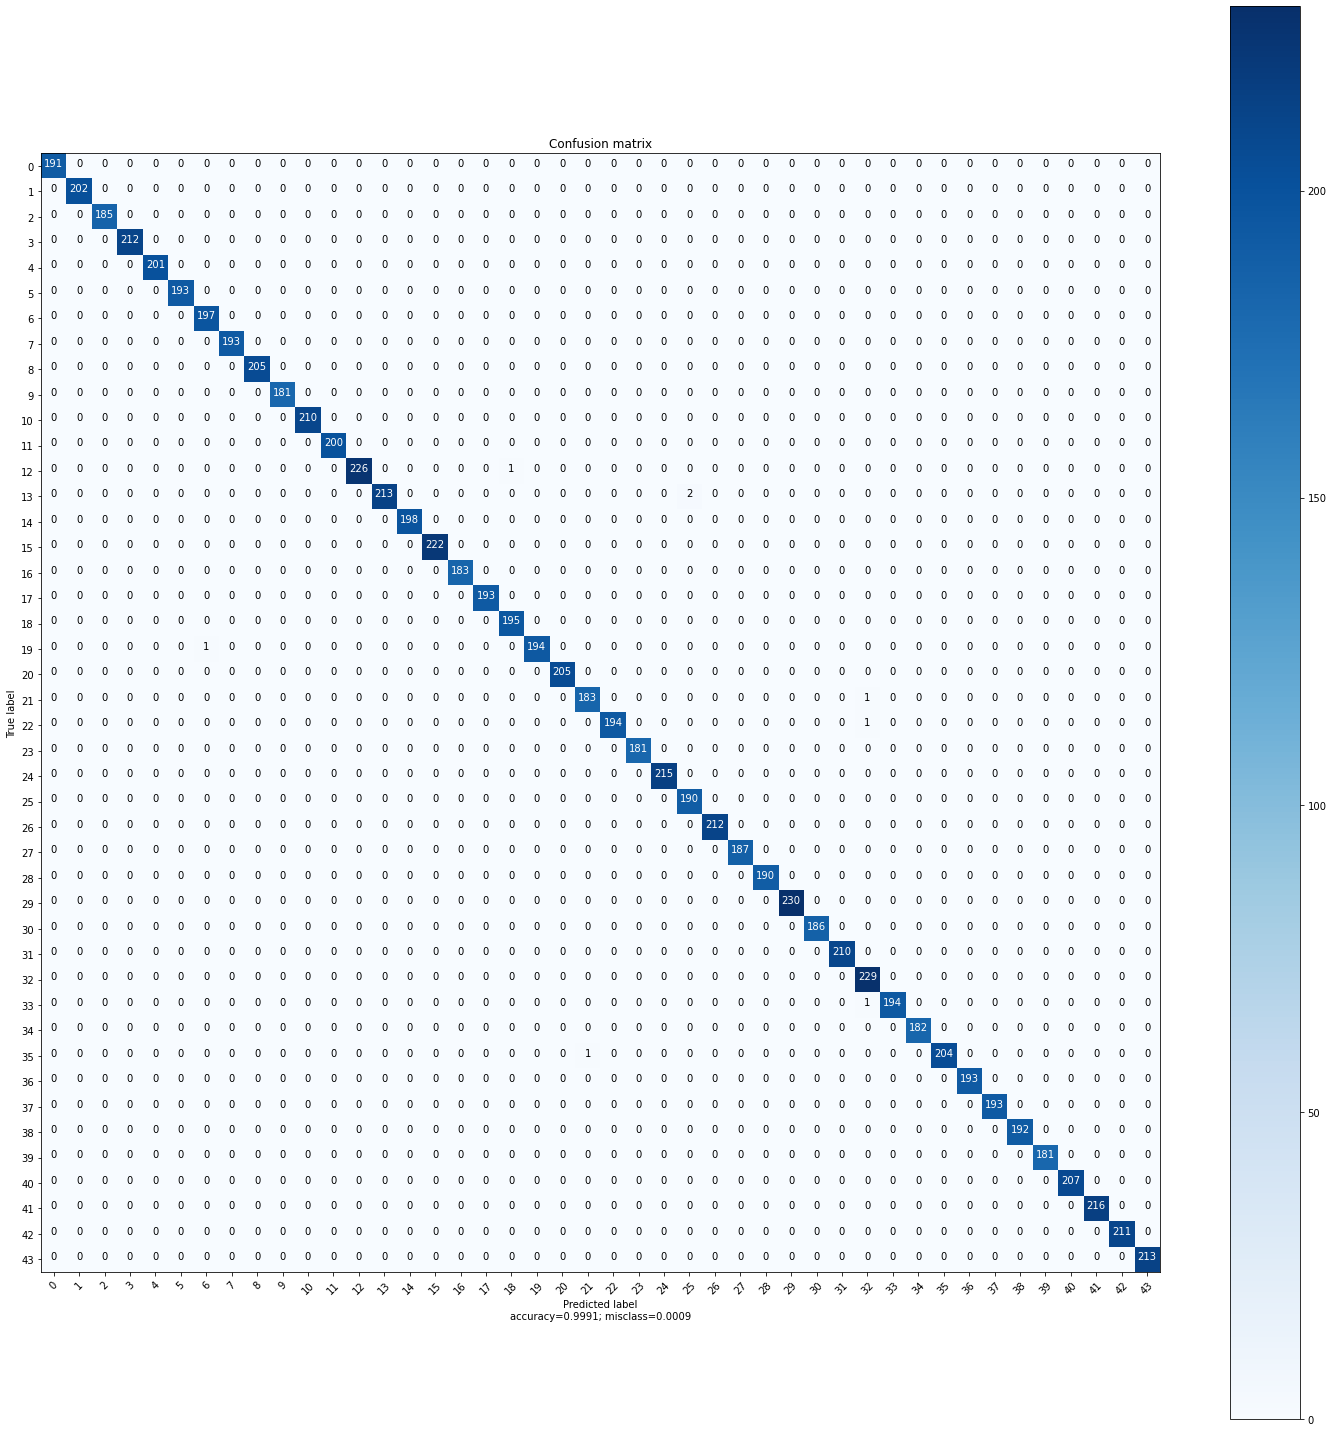

In [3]:
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import numpy as np
import time
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import itertools

    acc = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - acc

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 20))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('The true label')
    plt.xlabel('Predicted labels\naccuracy={:0.4f}; misclass={:0.4f}'.format(acc, misclass))
    plt.savefig('confusion_matrix.png')


image_x, image_y = 50, 50
with open("test_image", "rb") as f:
    test_images = np.array(pickle.load(f))
with open("test_label", "rb") as f:
    test_labels = np.array(pickle.load(f), dtype=np.int32)
test_images = np.reshape(test_images, (test_images.shape[0], image_x, image_y, 1))


model = load_model('cnn_model_keras2.h5')
pred_labels = []

start_time = time.time()
pred_probabs = model.predict(test_images)
end_time = time.time()
pred_time = end_time-start_time
avg_pred_time = pred_time/test_images.shape[0]
print("Time that is taken to predict %d test image is %ds" %(test_images.shape[0], pred_time))
print('Average prediction time is: %fs' % (avg_pred_time))

for pred_probab in pred_probabs:
    pred_labels.append(list(pred_probab).index(max(pred_probab)))

cm = confusion_matrix(test_labels, np.array(pred_labels))
classification_report = classification_report(test_labels, np.array(pred_labels))
print('\n\nThe Classification Report') 
print('-------------------------')
print(classification_report)
plot_confusion_matrix(cm, range(44), normalize=False)

# Recognize Gesture

In [2]:
import time
import cv2, pickle
import numpy as np
import tensorflow as tf
import os
import sqlite3
from keras.models import load_model

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

prediction = None
model = load_model('cnn_model_keras2.h5')

print('Model Loaded')
def get_image_size():
    image = cv2.imread('gestures/0/100.jpg', 0)
    return image.shape

image_x, image_y = get_image_size()

def tf_process_image(image):
    image = cv2.resize(image, (image_x, image_y))
    image = np.array(image, dtype=np.float32)
    np_array = np.array(image)
    return np_array

def tf_predict(classifier, image):
    '''
    need help with prediction using tensorflow
    '''
    global prediction
    processed_array = tf_process_image(image)
    pred_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x":processed_array}, shuffle=False)
    pred = classifier.predict(input_fn=pred_input_fn)
    prediction = next(pred)
    print(prediction)

def keras_process_image(image):
    image = cv2.resize(image, (image_x, image_y))
    image = np.array(image, dtype=np.float32)
    image = np.reshape(image, (1, image_x, image_y, 1))
    return image

def keras_predict(model, image):
    processed = keras_process_image(image)
    pred_probab = model.predict(processed)[0]
    pred_class = list(pred_probab).index(max(pred_probab))
    return max(pred_probab), pred_class

def get_pred_text_from_db(pred_class):
    conn = sqlite3.connect("gesture_db.db")
    cmd = "SELECT g_name FROM gesture WHERE g_id="+str(pred_class)
    cursor = conn.execute(cmd)
    for row in cursor:
        return row[0]

def split_sentence(text, num_of_words):
    '''
    Splits a text into group of num_of_words
    '''
    list_words = text.split(" ")
    length = len(list_words)
    splitted_sentence = []
    b_index = 0
    e_index = num_of_words
    while length > 0:
        part = ""
        for word in list_words[b_index:e_index]:
            part = part + " " + word
        splitted_sentence.append(part)
        b_index += num_of_words
        e_index += num_of_words
        length -= num_of_words
    return splitted_sentence

def put_splitted_text_in_blackboard(blackboard, splitted_text):
    y = 200
    for text in splitted_text:
        cv2.putText(blackboard, text, (4, y), cv2.FONT_HERSHEY_TRIPLEX, 2, (255, 255, 255))
        y += 50

def get_hand_histogram():
    with open("hist", "rb") as f:
        hist = pickle.load(f)
    return hist

def recognize():
    global prediction
    camera = cv2.VideoCapture(1)
    if camera.read()[0] == False:
        camera = cv2.VideoCapture(0)
    hist = get_hand_histogram()
    x, y, width, height = 300, 100, 300, 300
    while True:
        text = ""
        image = camera.read()[1]
        image = cv2.flip(image, 1)
        image = cv2.resize(image, (640, 480))
        imageCrop = image[y:y+height, x:x+width]
        imgHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([imgHSV], [0, 1], hist, [0, 180, 0, 256], 1)
        disc = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(10,10))
        cv2.filter2D(dst,-1,disc,dst)
        blur = cv2.GaussianBlur(dst, (11,11), 0)
        blur = cv2.medianBlur(blur, 15)
        thresh = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
        thresh = cv2.merge((thresh,thresh,thresh))
        thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)
        thresh = thresh[y:y+height, x:x+width]
        (openCV_ver,_,__) = cv2.__version__.split(".")
        if openCV_ver=='3':
            contours = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[1]
        elif openCV_ver=='4':
            contours = cv2.findContours(thresh.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[0]
        if len(contours) > 0:
            contour = max(contours, key = cv2.contourArea)
            #print(cv2.contourArea(contour))
            if cv2.contourArea(contour) > 10000:
                x1, y1, width1, height1 = cv2.boundingRect(contour)
                save_img = thresh[y1:y1+height1, x1:x1+width1]
                
                if width1 > height1:
                    save_img = cv2.copyMakeBorder(save_img, int((width1-height1)/2) , int((width1-height1)/2) , 0, 0, cv2.BORDER_CONSTANT, (0, 0, 0))
                elif height1 > width1:
                    save_img = cv2.copyMakeBorder(save_img, 0, 0, int((height1-width1)/2) , int((height1-width1)/2) , cv2.BORDER_CONSTANT, (0, 0, 0))
                
                pred_probab, pred_class = keras_predict(model, save_img)
                
                if pred_probab*100 > 80:
                    text = get_pred_text_from_db(pred_class)
                    print(text)

        blackboard = np.zeros((480, 640, 3), dtype=np.uint8)
        splitted_text = split_sentence(text, 2)
        put_splitted_text_in_blackboard(blackboard, splitted_text)

        cv2.rectangle(image, (x,y), (x+width, y+height), (0,255,0), 2)
        res = np.hstack((image, blackboard))
        cv2.imshow("Recognizing gesture", res)
        cv2.imshow("thresh", thresh)
        k = cv2.waitKey(1) & 0XFF
        if k == ord('q'):
            cv2.destroyAllWindows()
            break


recognize()


Model Loaded
A
A
A
A
J
A
A
A
A
A
J
A
A
A
A
A
A
X
A
A
A
A
A
A
0
A
A
A
A
J
A
A
A
X
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
J
A
X
A
A
A
A
A
A
J
J
A
A
J
A
0
X
J
0
0
J
J
A
A
A
A
A
0
J
J
0
J
W
J
J
W
J
J
J
J
0
J
5
J
J
0
A
A
A
A
J
J
J
J
J
J
J
J
0
0
J
J
J
J
5
0
J
J
0
J
J
A
A
A
A
A
A
A
J
J
J
J
J
J
J
A
J
J
J
A
A
A
A
A
A
J
A
A
A
A
J
A
J
J
J
J
J
A
J
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
A
J
A
A
A
A
A
A
A
A
A
A
A
A
J
A
J
W
A
A
A
A
A
A
J
W
A
W
A
A
A
A
J
A
A
J
J
J
J
J
J
A
J
J
J
J
J
J
J
J
0
J
0
0
A
A
A
A
A
W
W
A
A
A
A
A
A
W
W
A
J
W
W
J
J
A
A
A
J
A
A
A
A
A
A
A
A
W
A
A
A
A
W
A
A
A
A
W
J
W
W
A
W
W
W
W
W
A
W
A
W
W
W
A
J
A
A
A
A
W
J
A
J
A
A
A
A
A
A
Harsh Sharma
A
A
A
J
A
A
J
3
J
J
3
J
J
A
J
A
W
A
W
J
J
A
W
J
Y
J
J
3
J
J
J
J
W
J
W
J
J
A
A
A
J
J
J
J
J
5
J
J
A
J
J
J
J
0
J
J
J
W
A
W
A
A
A
A
J
A
A
W
J
W
W
J
W
A
A
J
A
J
A
A
W
J
A
A
A
J
A
A
X
J
3
X
W
J
A
Harsh Sharma
W
Harsh Sharma
J
A
C
J
J
C
J
J
J
J
J
J
J
J
J
0
J
J
Harsh Sharma
Harsh Sharma
L
3
C
0
J
J
J
3
C
3
3
3
C
3
C
3
0
C
C
C
C
J
J
0
J
Harsh Sh